In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup, Comment
import re
import json
import time

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv('2yrresults.csv')
df

,Unnamed: 0,team,home,opponent,week,win?,points_for,points_against,times_sacked,yards_per_play_offense,...,total_wins,total_losses,away,spread,favorite,underdog,covered_spread?,opponent_covered_spread?,fav_won,fav_covered
0,0,EAGLES,1,FALCONS,1.0,1,18.0,12.0,2.0,3.625000,...,1.0,0.0,0,0.0,0,0,1,0,0.0,NaN
1,1,LIONS,1,JETS,1.0,0,17.0,48.0,0.0,5.059700,...,0.0,1.0,0,-7.0,1,0,0,1,0.0,0.0
2,2,JETS,0,LIONS,1.0,1,48.0,17.0,2.0,5.915300,...,1.0,0.0,1,7.0,0,1,1,0,0.0,NaN
3,3,RAIDERS,1,RAMS,1.0,0,13.0,33.0,1.0,6.171900,...,0.0,1.0,0,6.5,0,1,0,1,0.0,0.0
4,4,RAMS,0,RAIDERS,1.0,1,33.0,13.0,1.0,6.083300,...,1.0,0.0,1,-6.5,1,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,529,CHIEFS,1,TITANS,20.0,1,35.0,24.0,2.0,6.312500,...,14.0,4.0,0,-7.0,1,0,1,0,1.0,1.0
1042,530,49ERS,1,PACKERS,20.0,1,37.0,20.0,1.0,6.941176,...,15.0,3.0,0,-8.0,1,0,1,0,1.0,1.0
1043,531,TITANS,0,CHIEFS,20.0,0,24.0,35.0,3.0,5.086200,...,11.0,8.0,1,7.0,0,1,0,1,0.0,0.0
1044,532,CHIEFS,1,49ERS,21.0,1,31.0,20.0,4.0,5.293333,...,15.0,4.0,0,-1.0,1,0,1,0,1.0,1.0


In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df = df.fillna(value=0)

In [5]:
df.columns

Index(['team', 'home', 'opponent', 'week', 'win?', 'points_for',
       'points_against', 'times_sacked', 'yards_per_play_offense',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'FGM', 'penalty_yards', 'loss?', 'total_wins',
       'total_losses', 'away', 'spread', 'favorite', 'underdog',
       'covered_spread?', 'opponent_covered_spread?', 'fav_won',
       'fav_covered'],
      dtype='object')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,team,opponent,week,home,away,points_for,points_against,...,favorite,underdog,rushing_attempts,rushing_yards,rushing_yards_per_attempt,time_of_possession,penalty_yards,passing_yards_per_attempt,FGA,FGM
0,0,0,0,CARDINALS,LIONS,1,1,0,27,27,...,0,1,23.0,112.0,4.87,0.510278,35.0,5.092593,4.0,4.0
1,1,1,1,FALCONS,VIKINGS,1,0,1,12,28,...,0,1,17.0,73.0,4.29,0.503611,78.0,5.913043,0.0,0.0
2,2,2,2,RAVENS,DOLPHINS,1,0,1,59,10,...,1,0,46.0,265.0,5.76,0.668611,40.0,14.538462,1.0,1.0
3,3,3,3,BILLS,JETS,1,0,1,17,16,...,0,1,25.0,128.0,5.12,0.466389,55.0,6.540541,1.0,1.0
4,4,4,4,PANTHERS,RAMS,1,1,0,27,30,...,0,1,23.0,127.0,5.52,0.445556,46.0,5.684211,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,529,544,529,CHIEFS,TITANS,20,1,0,35,24,...,1,0,27.0,112.0,4.15,0.497222,61.0,8.342857,0.0,0.0
530,530,545,530,49ERS,PACKERS,20,1,0,37,20,...,1,0,42.0,285.0,6.79,0.479722,10.0,8.625000,3.0,3.0
531,531,547,531,TITANS,CHIEFS,20,0,1,24,35,...,0,1,23.0,85.0,3.70,0.502778,85.0,6.562500,1.0,1.0
532,532,548,532,CHIEFS,49ERS,21,1,0,31,20,...,1,0,29.0,129.0,4.45,0.553611,24.0,6.380952,1.0,1.0


In [8]:
df['win?'] = df['win?'].replace(to_replace=[1,0], value=[True, False])

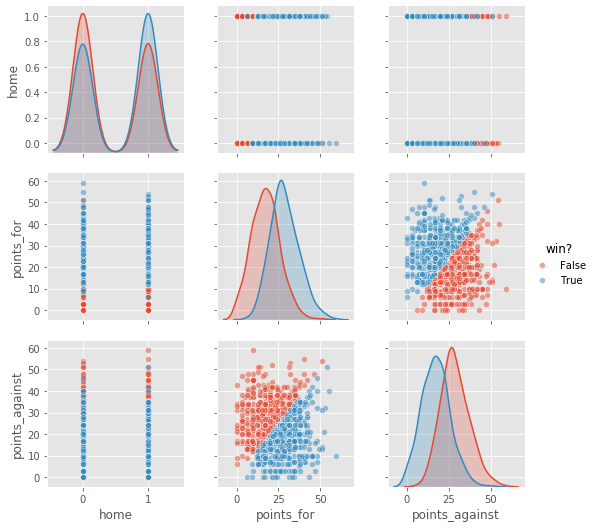

In [9]:
sns.pairplot(df.iloc[:,[1,4,5,6]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[1,5,6]])

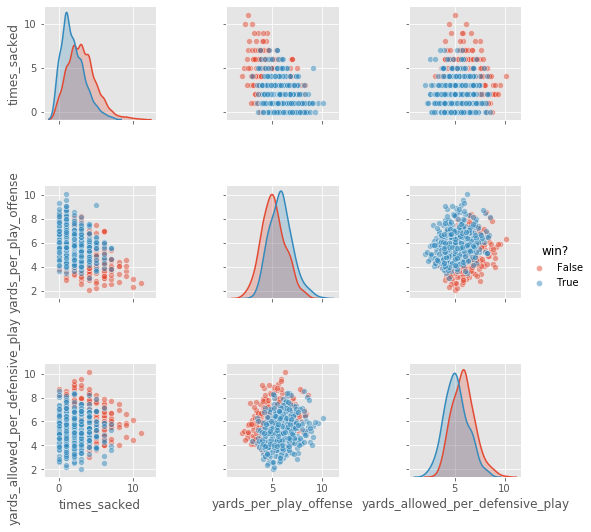

In [10]:
sns.pairplot(df.iloc[:,[4,7,8,9]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[7,8,9]])

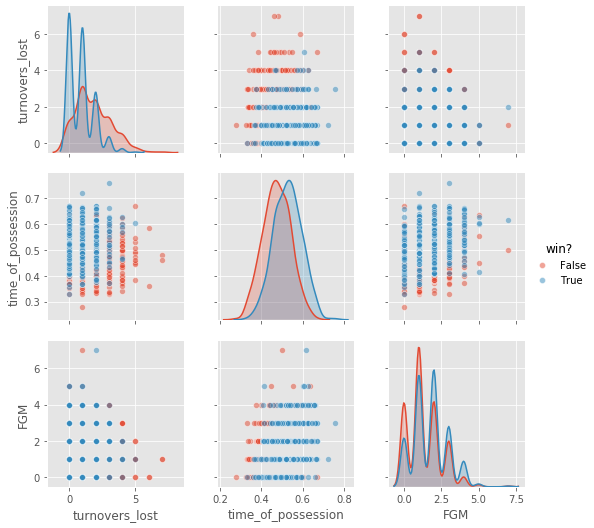

In [11]:
sns.pairplot(df.iloc[:,[4,10,11,12]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[10,11,12]])

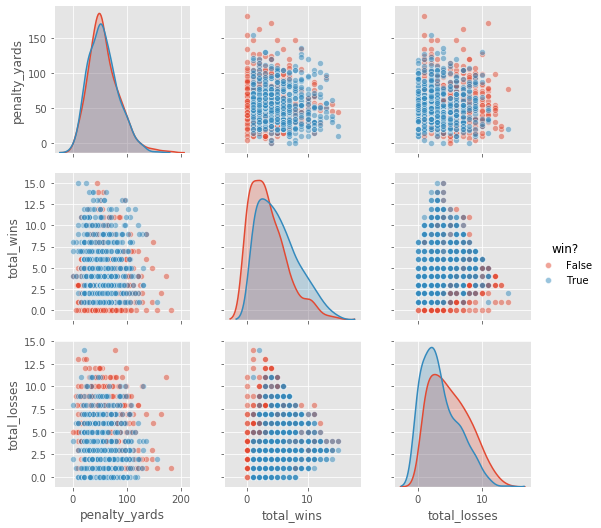

In [12]:
sns.pairplot(df.iloc[:,[4,13,15,16]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[13,15,16]])

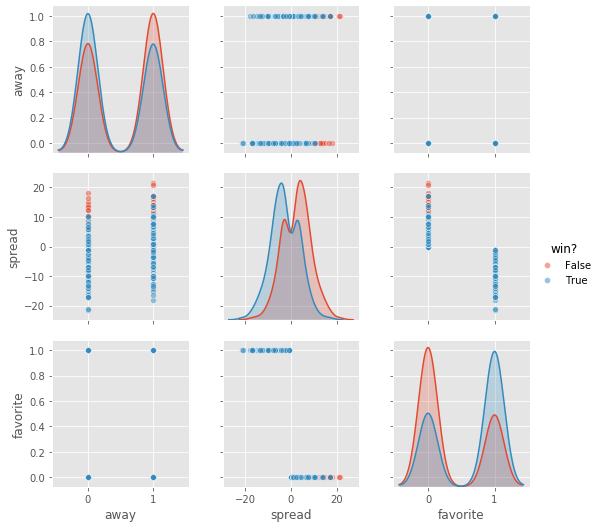

In [13]:
sns.pairplot(df.iloc[:,[4,17,18,19]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[17,18,19]])

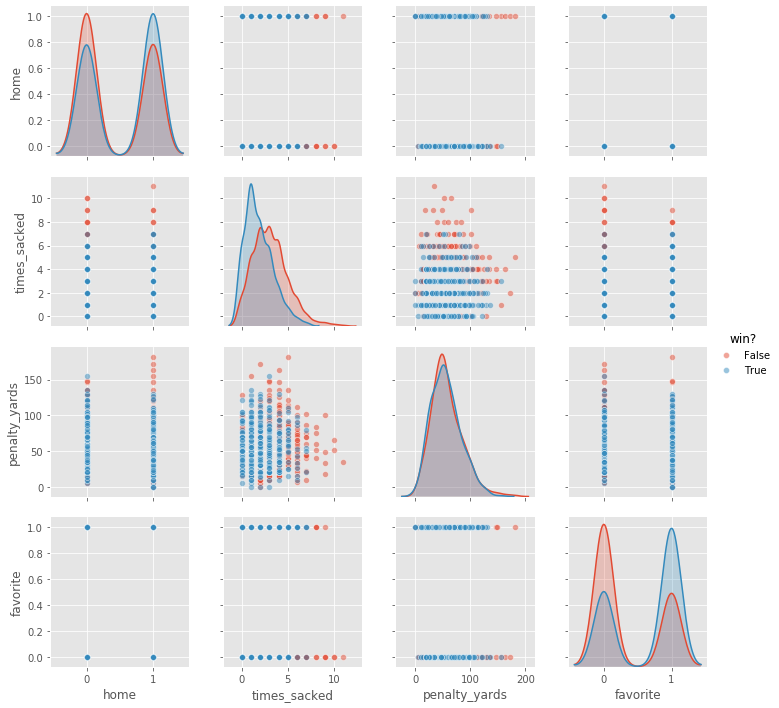

In [16]:
sns.pairplot(df.iloc[:,[1,4,7,13,19]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[1,7,13,19]])

In [43]:
plt.style.use('ggplot')

In [950]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'team', 'opponent',
       'week', 'home', 'away', 'points_for', 'points_against', 'over_under',
       'yards_per_play_offense', 'yards_allowed_per_defensive_play',
       'total_yards', 'total_yards_allowed', 'turnovers_lost', 'sacks',
       'times_sacked', 'win?', 'loss?', 'covered_spread?',
       'opponent_covered_spread?', 'game_id', 'total_wins', 'total_losses',
       'spread', 'opponent_spread', 'favorite', 'underdog', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'time_of_possession',
       'penalty_yards', 'passing_yards_per_attempt', 'FGA', 'FGM'],
      dtype='object')

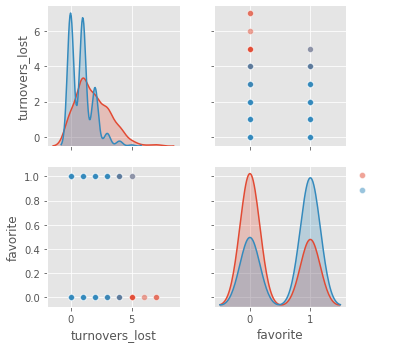

<Figure size 432x288 with 0 Axes>

In [952]:
fig = sns.pairplot(df.iloc[:,[15,18,27]], hue='win?', plot_kws=dict(alpha=0.5),
             vars=df.iloc[:,[15,27]])


plt.show(fig)
plt.savefig('eda.png')

In [21]:
df_fav = df[df['favorite']==1]
df_fav

,team,home,opponent,week,win?,points_for,points_against,times_sacked,yards_per_play_offense,yards_allowed_per_defensive_play,...,total_wins,total_losses,away,spread,favorite,underdog,covered_spread?,opponent_covered_spread?,fav_won,fav_covered
1,LIONS,1,JETS,1.0,False,17.0,48.0,0.0,5.059700,5.915300,...,0.0,1.0,0,-7.0,1,0,0,1,0.0,0.0
4,RAMS,0,RAIDERS,1.0,True,33.0,13.0,1.0,6.083300,6.171900,...,1.0,0.0,1,-6.5,1,0,1,0,1.0,1.0
6,PANTHERS,1,COWBOYS,1.0,True,16.0,8.0,3.0,4.803300,4.070200,...,1.0,0.0,0,-3.0,1,0,1,0,1.0,1.0
11,CARDINALS,1,REDSKINS,1.0,False,6.0,24.0,2.0,4.176500,5.720000,...,0.0,1.0,0,-2.0,1,0,0,1,0.0,0.0
13,BRONCOS,1,SEAHAWKS,1.0,True,27.0,24.0,1.0,6.527800,5.563600,...,1.0,0.0,0,-3.0,1,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,CHIEFS,1,TEXANS,19.0,True,51.0,31.0,1.0,7.614035,5.666667,...,13.0,4.0,0,-10.0,1,0,1,0,1.0,1.0
1038,49ERS,1,VIKINGS,19.0,True,27.0,10.0,2.0,4.529412,3.266667,...,14.0,3.0,0,-7.0,1,0,1,0,1.0,1.0
1041,CHIEFS,1,TITANS,20.0,True,35.0,24.0,2.0,6.312500,5.086207,...,14.0,4.0,0,-7.0,1,0,1,0,1.0,1.0
1042,49ERS,1,PACKERS,20.0,True,37.0,20.0,1.0,6.941176,6.172414,...,15.0,3.0,0,-8.0,1,0,1,0,1.0,1.0


In [31]:
df_udog = df[df['favorite']==0]
df_udog

,team,home,opponent,week,win?,points_for,points_against,times_sacked,yards_per_play_offense,yards_allowed_per_defensive_play,...,total_wins,total_losses,away,spread,favorite,underdog,covered_spread?,opponent_covered_spread?,fav_won,fav_covered
0,EAGLES,1,FALCONS,1.0,True,18.0,12.0,2.0,3.6250,4.6000,...,1.0,0.0,0,0.0,0,0,1,0,0.0,0.0
2,JETS,0,LIONS,1.0,True,48.0,17.0,2.0,5.9153,5.0597,...,1.0,0.0,1,7.0,0,1,1,0,0.0,0.0
3,RAIDERS,1,RAMS,1.0,False,13.0,33.0,1.0,6.1719,6.0833,...,0.0,1.0,0,6.5,0,1,0,1,0.0,0.0
5,BILLS,0,RAVENS,1.0,False,3.0,47.0,6.0,2.5082,4.9865,...,0.0,1.0,1,8.0,0,1,0,1,0.0,0.0
7,BEARS,0,PACKERS,1.0,False,23.0,24.0,4.0,4.4545,6.2712,...,0.0,1.0,1,7.0,0,1,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,SEAHAWKS,0,PACKERS,19.0,False,23.0,28.0,5.0,6.2500,5.8305,...,12.0,6.0,1,4.5,0,1,0,1,0.0,0.0
1039,TITANS,0,RAVENS,19.0,True,28.0,12.0,1.0,5.6604,5.7609,...,11.0,7.0,1,10.0,0,1,1,0,0.0,0.0
1040,PACKERS,0,49ERS,20.0,False,20.0,37.0,3.0,6.1724,6.9412,...,14.0,4.0,1,3.0,0,1,0,1,0.0,0.0
1043,TITANS,0,CHIEFS,20.0,False,24.0,35.0,3.0,5.0862,6.3125,...,11.0,8.0,1,7.0,0,1,0,1,0.0,0.0


In [23]:
df_fav['point_diff'] = df_fav['points_for'] - df_fav['points_against'] 

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_udog['point_diff'] = df_udog['points_for'] - df_udog['points_against'] 

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_udog['abs_spread'] = abs(df_udog['spread'])
df_udog.columns

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['team', 'home', 'opponent', 'week', 'win?', 'points_for',
       'points_against', 'times_sacked', 'yards_per_play_offense',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'FGM', 'penalty_yards', 'loss?', 'total_wins',
       'total_losses', 'away', 'spread', 'favorite', 'underdog',
       'covered_spread?', 'opponent_covered_spread?', 'fav_won', 'fav_covered',
       'point_diff', 'abs_spread'],
      dtype='object')

In [228]:
df_fav.columns

Index(['team', 'home', 'opponent', 'week', 'win?', 'points_for',
       'points_against', 'times_sacked', 'yards_per_play_offense',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'FGM', 'penalty_yards', 'loss?', 'total_wins',
       'total_losses', 'away', 'spread', 'favorite', 'underdog',
       'covered_spread?', 'opponent_covered_spread?', 'fav_won', 'fav_covered',
       'point_diff', 'abs_spread'],
      dtype='object')

In [38]:
#plt.style.use('dark_background')

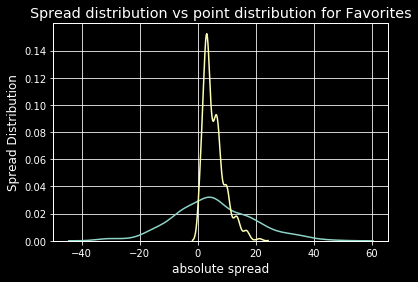

<Figure size 432x288 with 0 Axes>

In [39]:
fig = sns.distplot(df_fav.iloc[:,25], hist=False, rug=False)
fig = sns.distplot(df_fav.iloc[:,26], hist=False, rug=False)




plt.xlabel("absolute spread")
plt.ylabel("Spread Distribution")
plt.title("Spread distribution vs point distribution for Favorites") # You can comment this line out if you don't need title
plt.show(fig)
plt.savefig('eda6820.png')

In [221]:
df_udog['inverse_spread'] = -1 * df_udog['abs_spread']

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [224]:
df_udog.columns

Index(['team', 'home', 'opponent', 'week', 'win?', 'points_for',
       'points_against', 'times_sacked', 'yards_per_play_offense',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'FGM', 'penalty_yards', 'loss?', 'total_wins',
       'total_losses', 'away', 'spread', 'favorite', 'underdog',
       'covered_spread?', 'opponent_covered_spread?', 'fav_won', 'fav_covered',
       'point_diff', 'abs_spread', 'inverse_spread'],
      dtype='object')

In [288]:
plt.style.use('ggplot')

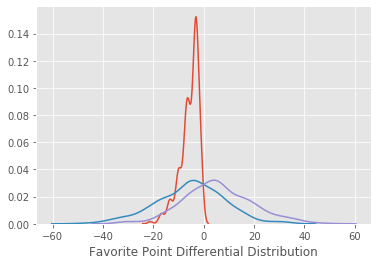

In [308]:

fig = sns.distplot(df_fav.iloc[:,18], hist=False, rug=False, axlabel='Spread Distribution')
fig = sns.distplot(df_udog.iloc[:,25], hist=False, rug=False, axlabel='Underdog Point Differential Distribution')
fig = sns.distplot(df_fav.iloc[:,25], hist=False, rug=False, axlabel='Point Differential Distribution')


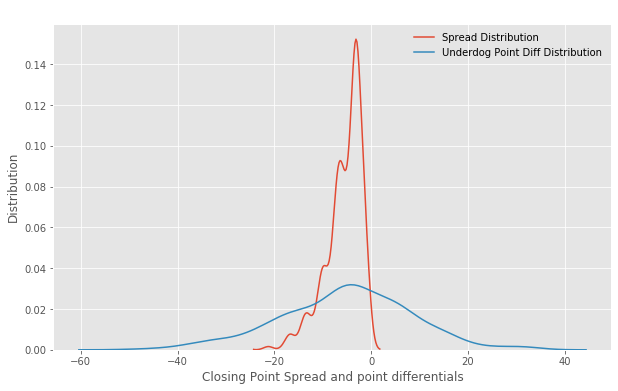

<Figure size 432x288 with 0 Axes>

In [316]:

fig,ax = plt.subplots(figsize=(10,6))

lst1 = list(df_fav.iloc[:,18])
lst2 = list(df_udog.iloc[:,25])
#lst3 = list(df_fav.iloc[:,25])

sns.distplot(lst1, hist=False, rug=False, label='Spread Distribution')
sns.distplot(lst2, hist=False, rug=False, label='Underdog Point Diff Distribution')
#sns.distplot(lst3, hist=False, rug=False, label='Favorite Point Diff Distribution')

ax.set_xlabel("Closing Point Spread and point differentials")
ax.set_ylabel("Distribution")
ax.set_title("Spread distribution vs point distribution")
leg = plt.legend(framealpha = 0, loc = 'best')
for text in leg.get_texts():
    plt.setp(text, color = 'black')
plt.show()
plt.savefig('eda6920.png')

In [ ]:
plt.style

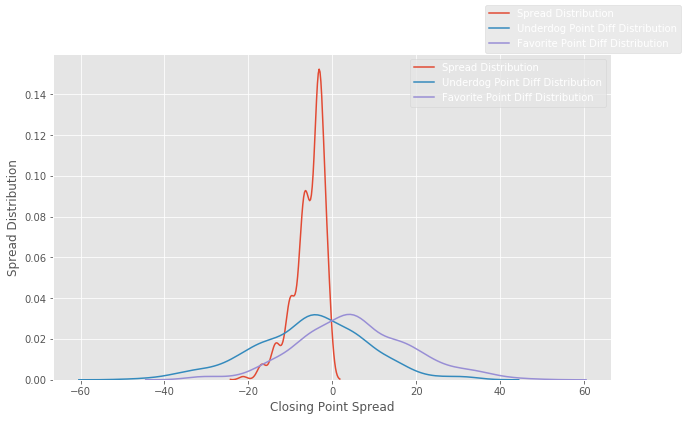

In [310]:
fig,ax = plt.subplots(figsize=(10,6))

sns.distplot(df_fav.iloc[:,18], hist=False, rug=False, label='Spread Distribution')
sns.distplot(df_udog.iloc[:,25], hist=False, rug=False, label='Underdog Point Diff Distribution')
sns.distplot(df_fav.iloc[:,25], hist=False, rug=False, label='Favorite Point Diff Distribution')

ax.set_xlabel("Closing Point Spread")
ax.set_ylabel("Spread Distribution")
ax.set_title("Spread distribution vs point distribution")
fig.legend()

plt.show()

In [45]:
mod = pd.read_csv('gb_model682020.csv')

In [47]:
mod = mod.drop(columns='Unnamed: 0')

In [53]:
mod = mod.rename(columns={'game_id':'ID'})
mod

,team,proba_team_won,team_won,ID,opp,proba_opp_won,opp_won,week,money_line,opp_money_line
0,BENGALS,0.133279,0,204,STEELERS,0.083871,1,4,160.0,-179.0
1,BILLS,0.984659,0,205,PATRIOTS,0.999171,1,4,274.0,-321.0
2,PANTHERS,0.783940,1,206,TEXANS,0.871268,0,4,224.0,-257.0
3,BEARS,0.992527,1,207,VIKINGS,0.995449,0,4,-103.0,-107.0
4,RAVENS,0.998321,0,208,BROWNS,0.108093,1,4,-327.0,279.0
...,...,...,...,...,...,...,...,...,...,...
203,RAIDERS,0.000342,0,22,BRONCOS,0.023262,1,17,195.0,-221.0
204,STEELERS,0.571209,0,23,RAVENS,0.999822,1,17,-134.0,121.0
205,CHIEFS,0.999751,1,24,CHARGERS,0.218767,0,17,-389.0,325.0
206,SEAHAWKS,0.653026,0,25,49ERS,0.909134,1,17,159.0,-177.0


In [49]:
df2 = pd.read_csv('6820_incomplete.csv')

In [51]:
df3 = df2[['ID', 'team', 'opp', 'team_fav', 'opp_fav', 'decimal_ml', 'decimal_oml']]

In [52]:
df3

,ID,team,opp,team_fav,opp_fav,decimal_ml,decimal_oml
0,204,BENGALS,STEELERS,0,1,2.600000,1.558659
1,205,BILLS,PATRIOTS,0,1,3.740000,1.311526
2,206,PANTHERS,TEXANS,0,1,3.240000,1.389105
3,207,BEARS,VIKINGS,1,0,1.970874,1.934579
4,208,RAVENS,BROWNS,1,0,1.305810,3.790000
...,...,...,...,...,...,...,...
203,22,RAIDERS,BRONCOS,0,1,2.950000,1.452489
204,23,STEELERS,RAVENS,1,0,1.746269,2.210000
205,24,CHIEFS,CHARGERS,1,0,1.257069,4.250000
206,25,SEAHAWKS,49ERS,0,1,2.590000,1.564972


In [54]:
mod1 = mod.merge(df3, on=['ID','team','opp'], how='left')

In [57]:
mod1.loc[mod1['proba_team_won'] > mod1['proba_opp_won'], 'bet_placed'] = 'team'
mod1.loc[mod1['proba_team_won'] < mod1['proba_opp_won'], 'bet_placed'] = 'opp'
mod1.loc[mod1['proba_team_won'] == mod1['proba_opp_won'], 'bet_placed'] = 'push'


In [58]:
mod1

,team,proba_team_won,team_won,ID,opp,proba_opp_won,opp_won,week,money_line,opp_money_line,team_fav,opp_fav,decimal_ml,decimal_oml,bet_placed
0,BENGALS,0.133279,0,204,STEELERS,0.083871,1,4,160.0,-179.0,0,1,2.600000,1.558659,team
1,BILLS,0.984659,0,205,PATRIOTS,0.999171,1,4,274.0,-321.0,0,1,3.740000,1.311526,opp
2,PANTHERS,0.783940,1,206,TEXANS,0.871268,0,4,224.0,-257.0,0,1,3.240000,1.389105,opp
3,BEARS,0.992527,1,207,VIKINGS,0.995449,0,4,-103.0,-107.0,1,0,1.970874,1.934579,opp
4,RAVENS,0.998321,0,208,BROWNS,0.108093,1,4,-327.0,279.0,1,0,1.305810,3.790000,team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,RAIDERS,0.000342,0,22,BRONCOS,0.023262,1,17,195.0,-221.0,0,1,2.950000,1.452489,opp
204,STEELERS,0.571209,0,23,RAVENS,0.999822,1,17,-134.0,121.0,1,0,1.746269,2.210000,opp
205,CHIEFS,0.999751,1,24,CHARGERS,0.218767,0,17,-389.0,325.0,1,0,1.257069,4.250000,team
206,SEAHAWKS,0.653026,0,25,49ERS,0.909134,1,17,159.0,-177.0,0,1,2.590000,1.564972,opp


In [59]:
mod1.columns

Index(['team', 'proba_team_won', 'team_won', 'ID', 'opp', 'proba_opp_won',
       'opp_won', 'week', 'money_line', 'opp_money_line', 'team_fav',
       'opp_fav', 'decimal_ml', 'decimal_oml', 'bet_placed'],
      dtype='object')

In [60]:
### baseline bets ####

mod1['control_bet'] = 100

In [72]:
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'] >= 200), 'bet_amount'] = 200
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'].between(-200,200)), 'bet_amount'] = 100
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'] <= -200), 'bet_amount'] = 50
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'] >= 200), 'bet_amount'] = 200
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'].between(-200,200)), 'bet_amount'] = 100
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'] <= -200), 'bet_amount'] = 50

In [82]:
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'] >= 200), 'underdog_bet'] = 200
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'].between(100,200)), 'underdog_bet'] = 100
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'] <= -100), 'underdog_bet'] = 0
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'] >= 200), 'underdog_bet'] = 200
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'].between(100,200)), 'underdog_bet'] = 100
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'] <= -100), 'underdog_bet'] = 0

In [95]:
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'] >= 200), 'bet_amount2'] = 250
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'].between(-200,200)), 'bet_amount2'] = 150
mod1.loc[(mod1['bet_placed'] == 'opp') & (mod1['opp_money_line'] <= -200), 'bet_amount2'] = 75
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'] >= 200), 'bet_amount2'] = 250
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'].between(-200,200)), 'bet_amount2'] = 150
mod1.loc[(mod1['bet_placed'] == 'team') & (mod1['money_line'] <= -200), 'bet_amount2'] = 75

In [62]:
                                                                                                                           
mod1.loc[(mod1['opp_won']==1) & (mod1['bet_placed']=='opp'), 'amount_won'] = mod1['control_bet'] * mod1['decimal_oml']
mod1.loc[(mod1['team_won']==1) & (mod1['bet_placed']=='team'), 'amount_won'] = mod1['control_bet'] * mod1['decimal_ml']

In [74]:
mod1.loc[(mod1['opp_won']==1) & (mod1['bet_placed']=='opp'), 'amt_won1'] = mod1['bet_amount'] * mod1['decimal_oml']
mod1.loc[(mod1['team_won']==1) & (mod1['bet_placed']=='team'), 'amt_won1'] = mod1['bet_amount'] * mod1['decimal_ml']

In [98]:
mod1.loc[(mod1['opp_won']==1) & (mod1['bet_placed']=='opp'), 'amt_won_2'] = mod1['bet_amount2'] * mod1['decimal_oml']
mod1.loc[(mod1['team_won']==1) & (mod1['bet_placed']=='team'), 'amt_won_2'] = mod1['bet_amount2'] * mod1['decimal_ml']

In [84]:
mod1['underdog_bet'].value_counts()

0.0      165
100.0     38
200.0      5
Name: underdog_bet, dtype: int64

In [86]:
mod1.columns

Index(['team', 'proba_team_won', 'team_won', 'ID', 'opp', 'proba_opp_won',
       'opp_won', 'week', 'money_line', 'opp_money_line', 'team_fav',
       'opp_fav', 'decimal_ml', 'decimal_oml', 'bet_placed', 'control_bet',
       'amount_won', 'control_profit', 'bet_amount', 'amt_won1', 'algo1_prof',
       'underdog_bet'],
      dtype='object')

In [97]:
mod1.loc[(mod1['team_fav']==0) & (mod1['team_won']==1), 'amt_won2'] = mod1['underdog_bet'] * mod1['decimal_ml']      
mod1.loc[(mod1['opp_fav']==0) & (mod1['opp_won']==1), 'amt_won2'] = mod1['underdog_bet'] * mod1['decimal_oml']

In [89]:
mod1['amt_won2'] = mod1['amt_won2'].fillna(value=0)

In [76]:
mod1['amt_won1'] = mod1['amt_won1'].fillna(value=0)

In [100]:
mod1['amt_won_2'] = mod1['amt_won_2'].fillna(value=0)

In [64]:
mod1['amount_won'].isna().sum()

79

In [66]:
mod1['amount_won'] = mod1['amount_won'].fillna(value=0)

In [68]:
mod1['control_profit'] = mod1['amount_won'] - mod1['control_bet']

In [78]:
mod1['algo1_prof'] = mod1['amt_won1'] - mod1['bet_amount']

In [90]:
mod1['ud_prof'] = mod1['amt_won2'] - mod1['underdog_bet']

In [102]:
mod1['mod2_prof'] = mod1['amt_won_2'] - mod1['bet_amount2']

In [103]:
mod1

,team,proba_team_won,team_won,ID,opp,proba_opp_won,opp_won,week,money_line,opp_money_line,...,control_profit,bet_amount,amt_won1,algo1_prof,underdog_bet,amt_won2,ud_prof,bet_amount2,amt_won_2,mod2_prof
0,BENGALS,0.133279,0,204,STEELERS,0.083871,1,4,160.0,-179.0,...,-100.000000,100.0,0.000000,-100.000000,100.0,0.000000,-100.0,150.0,0.000000,-150.000000
1,BILLS,0.984659,0,205,PATRIOTS,0.999171,1,4,274.0,-321.0,...,31.152648,50.0,65.576324,15.576324,0.0,98.364486,0.0,75.0,98.364486,23.364486
2,PANTHERS,0.783940,1,206,TEXANS,0.871268,0,4,224.0,-257.0,...,-100.000000,50.0,0.000000,-50.000000,0.0,0.000000,0.0,75.0,0.000000,-75.000000
3,BEARS,0.992527,1,207,VIKINGS,0.995449,0,4,-103.0,-107.0,...,-100.000000,100.0,0.000000,-100.000000,0.0,0.000000,0.0,150.0,0.000000,-150.000000
4,RAVENS,0.998321,0,208,BROWNS,0.108093,1,4,-327.0,279.0,...,-100.000000,50.0,0.000000,-50.000000,0.0,0.000000,0.0,75.0,0.000000,-75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,RAIDERS,0.000342,0,22,BRONCOS,0.023262,1,17,195.0,-221.0,...,45.248869,50.0,72.624434,22.624434,0.0,108.936652,0.0,75.0,108.936652,33.936652
204,STEELERS,0.571209,0,23,RAVENS,0.999822,1,17,-134.0,121.0,...,121.000000,100.0,221.000000,121.000000,100.0,221.000000,121.0,150.0,331.500000,181.500000
205,CHIEFS,0.999751,1,24,CHARGERS,0.218767,0,17,-389.0,325.0,...,25.706941,50.0,62.853470,12.853470,0.0,94.280206,0.0,75.0,94.280206,19.280206
206,SEAHAWKS,0.653026,0,25,49ERS,0.909134,1,17,159.0,-177.0,...,56.497175,100.0,156.497175,56.497175,0.0,234.745763,0.0,150.0,234.745763,84.745763


In [70]:
y_control = np.cumsum(mod1['control_profit'])

In [80]:
y_1 = np.cumsum(mod1['algo1_prof'])

In [92]:
y_2 = np.cumsum(mod1['ud_prof'])

In [104]:
y_3 = np.cumsum(mod1['mod2_prof'])

In [285]:
model_2gbc['profit'].value_counts()

-100.000000    75
 0.000000      17
 103.000000     3
 16.000000      2
 135.000000     2
               ..
 23.866348      1
 115.873016     1
 112.406948     1
 15.873016      1
 181.967213     1
Name: profit, Length: 110, dtype: int64

In [286]:
y_ev = np.cumsum(model_2gbc['profit'])

In [366]:
y_1 = np.cumsum(df6['profit'])

In [451]:
model_2gb['profit'].sum()

265.29210039036536

In [328]:
y_fav = np.cumsum(model_2gbc['control_prof'])

In [944]:
y_fav1 = np.cumsum(model_2gbc['control_prof'][15:])

In [333]:
y_ud = np.cumsum(model_2gbc['control_prof_ud'])

In [943]:
y_ud1 = np.cumsum(model_2gbc['control_prof_ud'][15:])
y_ud1

15    -100.000000
16    -200.000000
17     -40.000000
18     356.000000
19     495.000000
          ...    
203   -309.164983
204   -188.164983
205   -288.164983
206   -388.164983
207   -488.164983
Name: control_prof_ud, Length: 193, dtype: float64

In [448]:
y_ev = np.cumsum(model_3gb['ev_profit'])

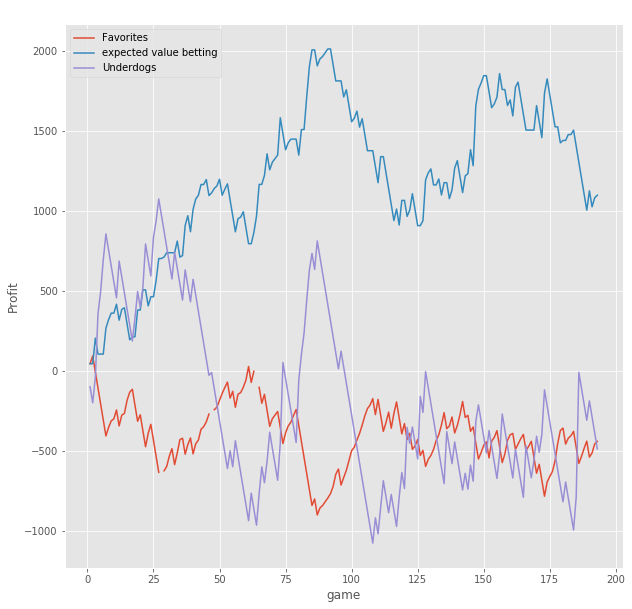

In [945]:
y = y_control
x = np.linspace(1,193,193)
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlabel("game")
ax.set_ylabel("Profit")
ax.set_title('Cumulative Profit - 2019 NFL Season')

ax.plot(x, y_fav1, label='Favorites')
#ax.plot(x, y_1, label='higher win proba')
#ax.plot(x, y_2, label='underdogs')
ax.plot(x,y_ev1, label='expected value betting')
#ax.plot(x, y_3, label='algo3')
ax.plot(x, y_ud1, label='Underdogs')

leg = ax.legend(loc='best')
for text in leg.get_texts():
    plt.setp(text, color = 'black')
plt.savefig('ev_betting4.png')

In [146]:
df.columns

Index(['Unnamed: 0', 'team', 'home', 'opponent', 'week', 'win?', 'points_for',
       'points_against', 'times_sacked', 'yards_per_play_offense',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'FGM', 'penalty_yards', 'loss?', 'total_wins',
       'total_losses', 'away', 'spread', 'favorite', 'underdog',
       'covered_spread?', 'opponent_covered_spread?', 'fav_won', 'fav_covered',
       'yr'],
      dtype='object')

In [152]:
df1 = pd.read_csv('6820df.csv')

In [116]:
dfnew3 = pd.read_csv('take2.csv')

In [148]:
testing_df = pd.read_csv('backup_stats5312020.csv')

In [149]:
df = testing_df.copy()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,team,opponent,week,home,away,points_for,points_against,...,favorite,underdog,rushing_attempts,rushing_yards,rushing_yards_per_attempt,time_of_possession,penalty_yards,passing_yards_per_attempt,FGA,FGM
0,0,0,0,CARDINALS,LIONS,1,1,0,27,27,...,0,1,23.0,112.0,4.87,0.510278,35.0,5.092593,4.0,4.0
1,1,1,1,FALCONS,VIKINGS,1,0,1,12,28,...,0,1,17.0,73.0,4.29,0.503611,78.0,5.913043,0.0,0.0
2,2,2,2,RAVENS,DOLPHINS,1,0,1,59,10,...,1,0,46.0,265.0,5.76,0.668611,40.0,14.538462,1.0,1.0
3,3,3,3,BILLS,JETS,1,0,1,17,16,...,0,1,25.0,128.0,5.12,0.466389,55.0,6.540541,1.0,1.0
4,4,4,4,PANTHERS,RAMS,1,1,0,27,30,...,0,1,23.0,127.0,5.52,0.445556,46.0,5.684211,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,529,544,529,CHIEFS,TITANS,20,1,0,35,24,...,1,0,27.0,112.0,4.15,0.497222,61.0,8.342857,0.0,0.0
530,530,545,530,49ERS,PACKERS,20,1,0,37,20,...,1,0,42.0,285.0,6.79,0.479722,10.0,8.625000,3.0,3.0
531,531,547,531,TITANS,CHIEFS,20,0,1,24,35,...,0,1,23.0,85.0,3.70,0.502778,85.0,6.562500,1.0,1.0
532,532,548,532,CHIEFS,49ERS,21,1,0,31,20,...,1,0,29.0,129.0,4.45,0.553611,24.0,6.380952,1.0,1.0


In [553]:
week_5 = df[df['week']== 5 ].fillna(value=0)
week_6 = df[df['week']== 6 ].fillna(value=0)
week_7 = df[df['week']== 7 ].fillna(value=0)
week_8 = df[df['week']== 8 ].fillna(value=0)
week_9 = df[df['week']== 9 ].fillna(value=0)
week_10 = df[df['week']== 10 ].fillna(value=0)
week_11 = df[df['week']== 11 ].fillna(value=0)
week_12 = df[df['week']== 12 ].fillna(value=0)
week_13 = df[df['week']== 13 ].fillna(value=0)
week_14 = df[df['week']== 14 ].fillna(value=0)
week_15 = df[df['week']== 15 ].fillna(value=0)
week_16 = df[df['week']== 16 ].fillna(value=0)
week_17 = df[df['week']== 17 ].fillna(value=0)

In [155]:
dfnew3.columns

Index(['Unnamed: 0', 'team', 'home', 'opponent', 'week', 'win?', 'points_for',
       'points_against', 'times_sacked', 'yards_per_play_offense',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'FGM', 'penalty_yards', 'loss?', 'total_wins',
       'total_losses', 'away', 'spread', 'favorite', 'underdog',
       'covered_spread?', 'opponent_covered_spread?', 'fav_won', 'fav_covered',
       'yr'],
      dtype='object')

In [156]:
dfnew3.shape

(534, 27)

In [158]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'team', 'opponent',
       'week', 'home', 'away', 'points_for', 'points_against', 'over_under',
       'yards_per_play_offense', 'yards_allowed_per_defensive_play',
       'total_yards', 'total_yards_allowed', 'turnovers_lost', 'sacks',
       'times_sacked', 'win?', 'loss?', 'covered_spread?',
       'opponent_covered_spread?', 'game_id', 'total_wins', 'total_losses',
       'spread', 'opponent_spread', 'favorite', 'underdog', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'time_of_possession',
       'penalty_yards', 'passing_yards_per_attempt', 'FGA', 'FGM'],
      dtype='object')

In [556]:
week_5 = df[df['week']== 5 ].fillna(value=0)
week_6 = df[df['week']== 6 ].fillna(value=0)
week_7 = df[df['week']== 7 ].fillna(value=0)
week_8 = df[df['week']== 8 ].fillna(value=0)
week_9 = df[df['week']== 9 ].fillna(value=0)
week_10 = df[df['week']== 10 ].fillna(value=0)
week_11 = df[df['week']== 11 ].fillna(value=0)
week_12 = df[df['week']== 12 ].fillna(value=0)
week_13 = df[df['week']== 13 ].fillna(value=0)
week_14 = df[df['week']== 14 ].fillna(value=0)
week_15 = df[df['week']== 15 ].fillna(value=0)
week_16 = df[df['week']== 16 ].fillna(value=0)
week_17 = df[df['week']== 17 ].fillna(value=0)

In [812]:
w1_3 = df[df['week']<=3].fillna(value=0)
w1_4 = df[df['week']<=4].fillna(value=0)
w1_5 = df[df['week']<=5].fillna(value=0)
w1_6 = df[df['week']<=6].fillna(value=0)
w2_7 = df[df['week'].between(2,7)].fillna(value=0)
w3_8 = df[df['week'].between(3,8)].fillna(value=0)
w4_9 = df[df['week'].between(4,9)].fillna(value=0)
w5_10 = df[df['week'].between(5,10)].fillna(value=0)
w6_11 = df[df['week'].between(6,11)].fillna(value=0)
w7_12 = df[df['week'].between(7,12)].fillna(value=0)
w8_13 = df[df['week'].between(8,13)].fillna(value=0)
w9_14 = df[df['week'].between(9,14)].fillna(value=0)
w10_15 = df[df['week'].between(10,15)].fillna(value=0)
w11_16 = df[df['week'].between(11,16)].fillna(value=0)

In [813]:
w5_train = w1_4
w6_train = w1_5
w7_train = w1_6
w8_train = w2_7
w9_train = w3_8
w10_train = w4_9
w11_train = w5_10
w12_train = w6_11
w13_train = w7_12
w14_train = w8_13
w15_train = w9_14
w16_train = w10_15
w17_train = w11_16

In [814]:
ta = []
teams = list(week_5['team'].unique())
for team in teams:
    avg = w5_train[w5_train['team']==team].mean()
    ta.append(avg)
avgs5 = pd.concat(ta, keys=w5_train['team'].unique())
avgs5 = avgs5.unstack(level=-1)

In [815]:
ta = []
teams = list(week_6['team'].unique())
for team in teams:
    avg = w6_train[w6_train['team']==team].mean()
    ta.append(avg)
avgs6 = pd.concat(ta, keys=w6_train['team'].unique())
avgs6 = avgs6.unstack(level=-1)

In [816]:
ta = []
teams = list(week_7['team'].unique())
for team in teams:
    avg = w7_train[w7_train['team']==team].mean()
    ta.append(avg)
avgs7 = pd.concat(ta, keys=w7_train['team'].unique())
avgs7 = avgs7.unstack(level=-1)

In [817]:
ta = []
teams = list(week_8['team'].unique())
for team in teams:
    avg = w8_train[w8_train['team']==team].mean()
    ta.append(avg)
avgs8 = pd.concat(ta, keys=w8_train['team'].unique())
avgs8 = avgs8.unstack(level=-1)

In [818]:
ta = []
teams = list(week_9['team'].unique())
for team in teams:
    avg = w9_train[w9_train['team']==team].mean()
    ta.append(avg)
avgs9 = pd.concat(ta, keys=w9_train['team'].unique())
avgs9 = avgs9.unstack(level=-1)

In [819]:
ta = []
teams = list(week_10['team'].unique())
for team in teams:
    avg = w10_train[w10_train['team']==team].mean()
    ta.append(avg)
avgs10 = pd.concat(ta, keys=w10_train['team'].unique())
avgs10 = avgs10.unstack(level=-1)

In [820]:
ta = []
teams = list(week_11['team'].unique())
for team in teams:
    avg = w11_train[w11_train['team']==team].mean()
    ta.append(avg)
avgs11 = pd.concat(ta, keys=w11_train['team'].unique())
avgs11 = avgs11.unstack(level=-1)

In [821]:
ta = []
teams = list(week_12['team'].unique())
for team in teams:
    avg = w12_train[w12_train['team']==team].mean()
    ta.append(avg)
avgs12 = pd.concat(ta, keys=w12_train['team'].unique())
avgs12 = avgs12.unstack(level=-1)

In [822]:
ta = []
teams = list(week_13['team'].unique())
for team in teams:
    avg = w13_train[w13_train['team']==team].mean()
    ta.append(avg)
avgs13 = pd.concat(ta, keys=w13_train['team'].unique())
avgs13 = avgs13.unstack(level=-1)

In [823]:
ta = []
teams = list(week_14['team'].unique())
for team in teams:
    avg = w14_train[w14_train['team']==team].mean()
    ta.append(avg)
avgs14 = pd.concat(ta, keys=w14_train['team'].unique())
avgs14 = avgs14.unstack(level=-1)

In [824]:
ta = []
teams = list(week_15['team'].unique())
for team in teams:
    avg = w15_train[w15_train['team']==team].mean()
    ta.append(avg)
avgs15 = pd.concat(ta, keys=w15_train['team'].unique())
avgs15 = avgs15.unstack(level=-1)

In [825]:
ta = []
teams = list(week_16['team'].unique())
for team in teams:
    avg = w16_train[w16_train['team']==team].mean()
    ta.append(avg)
avgs16 = pd.concat(ta, keys=w16_train['team'].unique())
avgs16 = avgs16.unstack(level=-1)


In [826]:
ta = []
teams = list(week_17['team'].unique())
for team in teams:
    avg = w17_train[w17_train['team']==team].mean()
    ta.append(avg)
avgs17 = pd.concat(ta, keys=w17_train['team'].unique())
avgs17 = avgs17.unstack(level=-1)

In [520]:
w4_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'team', 'opponent',
       'week', 'home', 'away', 'points_for', 'points_against', 'over_under',
       'yards_per_play_offense', 'yards_allowed_per_defensive_play',
       'total_yards', 'total_yards_allowed', 'turnovers_lost', 'sacks',
       'times_sacked', 'win?', 'loss?', 'covered_spread?',
       'opponent_covered_spread?', 'game_id', 'total_wins', 'total_losses',
       'spread', 'opponent_spread', 'favorite', 'underdog', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'time_of_possession',
       'penalty_yards', 'passing_yards_per_attempt', 'FGA', 'FGM'],
      dtype='object')

In [684]:
'''y_train_w4 = w4_train['win?']
#y_train_w4 = w4_train['covered_spread?']
X_train_w4 = w4_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]'''

'''y_test_w4 = week_4['win?']
#y_test_w4 = week_4['covered_spread?']
X_test_w4 = avgs4[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]'''

y_train_w5 = w5_train['win?']
#y_train_w5 = w5_train['covered_spread?']
X_train_w5 = w5_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w5 = week_5['win?']
#y_test_w5 = week_5['covered_spread?']
X_test_w5 = avgs5[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w6 = w6_train['win?']
#y_train_w6 = w6_train['covered_spread?']
X_train_w6 = w6_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w6 = week_6['win?']
#y_test_w6 = week_6['covered_spread?']
X_test_w6 = avgs6[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w7 = w7_train['win?']
#y_train_w7 = w7_train['covered_spread?']
X_train_w7 = w7_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w7 = week_7['win?']
#y_test_w7 = week_7['covered_spread?']
X_test_w7 = avgs7[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w8 = w8_train['win?']
#y_train_w8 = w8_train['covered_spread?']
X_train_w8 = w8_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w8 = week_8['win?']
#y_test_w8 = week_8['covered_spread?']
X_test_w8 = avgs8[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w9 = w9_train['win?']
#y_train_w9 = w9_train['covered_spread?']
X_train_w9 = w9_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w9 = week_9['win?']
#y_test_w9 = week_9['covered_spread?']
X_test_w9 = avgs9[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w10 = w10_train['win?']
#y_train_w10 = w10_train['covered_spread?']
X_train_w10 = w10_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w10 = week_10['win?']
#y_test_w10 = week_10['covered_spread?']
X_test_w10 = avgs10[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w11 = w11_train['win?']
#y_train_w11 = w11_train['covered_spread?']
X_train_w11 = w11_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w11 = week_11['win?']
#y_test_w11 = week_11['covered_spread?']
X_test_w11 = avgs11[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w12 = w12_train['win?']
#y_train_w12 = w12_train['covered_spread?']
X_train_w12 = w12_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w12 = week_12['win?']
#y_test_w12 = week_12['covered_spread?']
X_test_w12 = avgs12[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w13 = w13_train['win?']
#y_train_w13 = w13_train['covered_spread?']
X_train_w13 = w13_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w13 = week_13['win?']
#y_test_w13 = week_13['covered_spread?']
X_test_w13 = avgs13[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w14 = w14_train['win?']
#y_train_w14 = w14_train['covered_spread?']
X_train_w14 = w14_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w14 = week_14['win?']
#y_test_w14 = week_14['covered_spread?']
X_test_w14 = avgs14[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w15 = w15_train['win?']
#y_train_w15 = w15_train['covered_spread?']
X_train_w15 = w15_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w15 = week_15['win?']
#y_test_w15 = week_15['covered_spread?']
X_test_w15 = avgs15[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w16 = w16_train['win?']
#y_train_w16 = w16_train['covered_spread?']
X_train_w16 = w16_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w16 = week_16['win?']
#y_test_w16 = week_16['covered_spread?']
X_test_w16 = avgs16[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_train_w17 = w17_train['win?']
#y_train_w17 = w17_train['covered_spread?']
X_train_w17 = w17_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

y_test_w17 = week_17['win?']
#y_test_w17 = week_17['covered_spread?']
X_test_w17 = avgs17[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt']]

In [ ]:
# taking week 4 out for 6/12/20 test
y_train_w4 = w4_train['win?']
#y_train_w4 = w4_train['covered_spread?']
X_train_w4 = w4_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w4 = week_4['win?']
#y_test_w4 = week_4['covered_spread?']
X_test_w4 = avgs4[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

In [827]:
y_train_w5 = w5_train['win?']
#y_train_w5 = w5_train['covered_spread?']
X_train_w5 = w5_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w5 = week_5['win?']
#y_test_w5 = week_5['covered_spread?']
X_test_w5 = avgs5[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w6 = w6_train['win?']
#y_train_w6 = w6_train['covered_spread?']
X_train_w6 = w6_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w6 = week_6['win?']
#y_test_w6 = week_6['covered_spread?']
X_test_w6 = avgs6[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w7 = w7_train['win?']
#y_train_w7 = w7_train['covered_spread?']
X_train_w7 = w7_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w7 = week_7['win?']
#y_test_w7 = week_7['covered_spread?']
X_test_w7 = avgs7[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w8 = w8_train['win?']
#y_train_w8 = w8_train['covered_spread?']
X_train_w8 = w8_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w8 = week_8['win?']
#y_test_w8 = week_8['covered_spread?']
X_test_w8 = avgs8[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w9 = w9_train['win?']
#y_train_w9 = w9_train['covered_spread?']
X_train_w9 = w9_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w9 = week_9['win?']
#y_test_w9 = week_9['covered_spread?']
X_test_w9 = avgs9[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w10 = w10_train['win?']
#y_train_w10 = w10_train['covered_spread?']
X_train_w10 = w10_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w10 = week_10['win?']
#y_test_w10 = week_10['covered_spread?']
X_test_w10 = avgs10[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w11 = w11_train['win?']
#y_train_w11 = w11_train['covered_spread?']
X_train_w11 = w11_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w11 = week_11['win?']
#y_test_w11 = week_11['covered_spread?']
X_test_w11 = avgs11[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w12 = w12_train['win?']
#y_train_w12 = w12_train['covered_spread?']
X_train_w12 = w12_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w12 = week_12['win?']
#y_test_w12 = week_12['covered_spread?']
X_test_w12 = avgs12[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w13 = w13_train['win?']
#y_train_w13 = w13_train['covered_spread?']
X_train_w13 = w13_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w13 = week_13['win?']
#y_test_w13 = week_13['covered_spread?']
X_test_w13 = avgs13[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w14 = w14_train['win?']
#y_train_w14 = w14_train['covered_spread?']
X_train_w14 = w14_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w14 = week_14['win?']
#y_test_w14 = week_14['covered_spread?']
X_test_w14 = avgs14[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w15 = w15_train['win?']
#y_train_w15 = w15_train['covered_spread?']
X_train_w15 = w15_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w15 = week_15['win?']
#y_test_w15 = week_15['covered_spread?']
X_test_w15 = avgs15[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w16 = w16_train['win?']
#y_train_w16 = w16_train['covered_spread?']
X_train_w16 = w16_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w16 = week_16['win?']
#y_test_w16 = week_16['covered_spread?']
X_test_w16 = avgs16[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_train_w17 = w17_train['win?']
#y_train_w17 = w17_train['covered_spread?']
X_train_w17 = w17_train[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

y_test_w17 = week_17['win?']
#y_test_w17 = week_17['covered_spread?']
X_test_w17 = avgs17[['home', 'away', 'yards_per_play_offense', 
                 'yards_allowed_per_defensive_play', 'turnovers_lost',
                 'times_sacked', 'total_wins', 'total_losses', 'spread', 
                 'favorite', 'underdog', 'time_of_possession','penalty_yards','FGM']]

In [571]:
from sklearn.ensemble import GradientBoostingClassifier

In [904]:
model4 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4 )
model4.fit(X_train_w4, y_train_w4)

model5 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model5.fit(X_train_w5, y_train_w5)

model6 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model6.fit(X_train_w6, y_train_w6)

model7 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model7.fit(X_train_w7, y_train_w7)

model8 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model8.fit(X_train_w8, y_train_w8)

model9 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model9.fit(X_train_w9, y_train_w9)

model10 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model10.fit(X_train_w10, y_train_w10)

model11 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model11.fit(X_train_w11, y_train_w11)

model12 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model12.fit(X_train_w12, y_train_w12)

model13 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model13.fit(X_train_w13, y_train_w13)

model14 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model14.fit(X_train_w14, y_train_w14)

model15 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model15.fit(X_train_w15, y_train_w15)

model16 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model16.fit(X_train_w16, y_train_w16)

model17 = GradientBoostingClassifier(learning_rate=0.115, n_estimators=200, max_depth=4)
model17.fit(X_train_w17, y_train_w17)

GradientBoostingClassifier(learning_rate=0.115, max_depth=4, n_estimators=200)

In [456]:
from sklearn.ensemble import RandomForestClassifier

In [522]:
model4 = RandomForestClassifier()
model4.fit(X_train_w4, y_train_w4)

model5 = RandomForestClassifier()
model5.fit(X_train_w5, y_train_w5)

model6 = RandomForestClassifier()
model6.fit(X_train_w6, y_train_w6)

model7 = RandomForestClassifier()
model7.fit(X_train_w7, y_train_w7)

model8 = RandomForestClassifier()
model8.fit(X_train_w8, y_train_w8)

model9 = RandomForestClassifier()
model9.fit(X_train_w9, y_train_w9)

model10 = RandomForestClassifier()
model10.fit(X_train_w10, y_train_w10)

model11 = RandomForestClassifier()
model11.fit(X_train_w11, y_train_w11)

model12 = RandomForestClassifier()
model12.fit(X_train_w12, y_train_w12)

model13 = RandomForestClassifier()
model13.fit(X_train_w13, y_train_w13)

model14 = RandomForestClassifier()
model14.fit(X_train_w14, y_train_w14)

model15 = RandomForestClassifier()
model15.fit(X_train_w15, y_train_w15)

model16 = RandomForestClassifier()
model16.fit(X_train_w16, y_train_w16)

model17 = RandomForestClassifier()
model17.fit(X_train_w17, y_train_w17)

RandomForestClassifier()

In [ ]:
targa2 = model4.predict_proba(X_test_w4)[:,1:]
ta = week_4['team'].values.reshape(30,1)
oa = week_4['opponent'].values.reshape(30,1)
aa = week_4['win?'].values.reshape(30,1)
gida = week_4['game_id'].values.reshape(30,1)
fav1 = week_4['favorite'].values.reshape(30,1)

In [905]:
targa5 = model5.predict_proba(X_test_w5)[:,1:]
ta5 = week_5['team'].values.reshape(30,1)
oa5 = week_5['opponent'].values.reshape(30,1)
aa5 = week_5['win?'].values.reshape(30,1)
gida5 = week_5['game_id'].values.reshape(30,1)
fav5 = week_5['favorite'].values.reshape(30,1)

targa6 = model6.predict_proba(X_test_w6)[:,1:]
ta6 = week_6['team'].values.reshape(28,1)
oa6 = week_6['opponent'].values.reshape(28,1)
aa6 = week_6['win?'].values.reshape(28,1)
gida6 = week_6['game_id'].values.reshape(28,1)
fav6 = week_6['favorite'].values.reshape(28,1)

targa7 = model7.predict_proba(X_test_w7)[:,1:]
ta7 = week_7['team'].values.reshape(28,1)
oa7 = week_7['opponent'].values.reshape(28,1)
aa7 = week_7['win?'].values.reshape(28,1)
gida7 = week_7['game_id'].values.reshape(28,1)
fav7 = week_7['favorite'].values.reshape(28,1)

targa8 = model8.predict_proba(X_test_w8)[:,1:]
ta8 = week_8['team'].values.reshape(30,1)
oa8 = week_8['opponent'].values.reshape(30,1)
aa8 = week_8['win?'].values.reshape(30,1)
gida8 = week_8['game_id'].values.reshape(30,1)
fav8 = week_8['favorite'].values.reshape(30,1)

targa9 = model9.predict_proba(X_test_w9)[:,1:]
ta9 = week_9['team'].values.reshape(28,1)
oa9 = week_9['opponent'].values.reshape(28,1)
aa9 = week_9['win?'].values.reshape(28,1)
gida9 = week_9['game_id'].values.reshape(28,1)
fav9 = week_9['favorite'].values.reshape(28,1)

targa10 = model10.predict_proba(X_test_w10)[:,1:]
ta10 = week_10['team'].values.reshape(26,1)
oa10 = week_10['opponent'].values.reshape(26,1)
aa10 = week_10['win?'].values.reshape(26,1)
gida10 = week_10['game_id'].values.reshape(26,1)
fav10 = week_10['favorite'].values.reshape(26,1)

targa11 = model11.predict_proba(X_test_w11)[:,1:]
ta11 = week_11['team'].values.reshape(28,1)
oa11 = week_11['opponent'].values.reshape(28,1)
aa11 = week_11['win?'].values.reshape(28,1)
gida11 = week_11['game_id'].values.reshape(28,1)
fav11 = week_11['favorite'].values.reshape(28,1)

targa12 = model12.predict_proba(X_test_w12)[:,1:]
ta12 = week_12['team'].values.reshape(28,1)
oa12 = week_12['opponent'].values.reshape(28,1)
aa12 = week_12['win?'].values.reshape(28,1)
gida12 = week_12['game_id'].values.reshape(28,1)
fav12 = week_12['favorite'].values.reshape(28,1)

targa13 = model13.predict_proba(X_test_w13)[:,1:]
ta13 = week_13['team'].values.reshape(32,1)
oa13 = week_13['opponent'].values.reshape(32,1)
aa13 = week_13['win?'].values.reshape(32,1)
gida13 = week_13['game_id'].values.reshape(32,1)
fav13 = week_13['favorite'].values.reshape(32,1)

targa14 = model14.predict_proba(X_test_w14)[:,1:]
ta14 = week_14['team'].values.reshape(32,1)
oa14 = week_14['opponent'].values.reshape(32,1)
aa14 = week_14['win?'].values.reshape(32,1)
gida14 = week_14['game_id'].values.reshape(32,1)
fav14 = week_14['favorite'].values.reshape(32,1)

targa15 = model15.predict_proba(X_test_w15)[:,1:]
ta15 = week_15['team'].values.reshape(32,1)
oa15 = week_15['opponent'].values.reshape(32,1)
aa15 = week_15['win?'].values.reshape(32,1)
gida15 = week_15['game_id'].values.reshape(32,1)
fav15 = week_15['favorite'].values.reshape(32,1)

targa16 = model16.predict_proba(X_test_w16)[:,1:]
ta16 = week_16['team'].values.reshape(32,1)
oa16 = week_16['opponent'].values.reshape(32,1)
aa16 = week_16['win?'].values.reshape(32,1)
gida16 = week_16['game_id'].values.reshape(32,1)
fav16 = week_16['favorite'].values.reshape(32,1)

targa17 = model17.predict_proba(X_test_w17)[:,1:]
ta17 = week_17['team'].values.reshape(32,1)
oa17 = week_17['opponent'].values.reshape(32,1)
aa17 = week_17['win?'].values.reshape(32,1)
gida17 = week_17['game_id'].values.reshape(32,1)
fav17 = week_17['favorite'].values.reshape(32,1)

In [ ]:
result_ = pd.DataFrame(np.hstack([ta, oa, targa2, aa, gida, fav1]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

In [906]:

result_5= pd.DataFrame(np.hstack([ta5, oa5, targa5, aa5, gida5, fav5]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_6= pd.DataFrame(np.hstack([ta6, oa6, targa6, aa6, gida6, fav6]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_7= pd.DataFrame(np.hstack([ta7, oa7, targa7, aa7, gida7, fav7]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_8= pd.DataFrame(np.hstack([ta8, oa8, targa8, aa8, gida8, fav8]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_9= pd.DataFrame(np.hstack([ta9, oa9, targa9, aa9, gida9, fav9]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_10= pd.DataFrame(np.hstack([ta10, oa10, targa10, aa10, gida10, fav10]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_11= pd.DataFrame(np.hstack([ta11, oa11, targa11, aa11, gida11, fav11]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_12= pd.DataFrame(np.hstack([ta12, oa12, targa12, aa12, gida12, fav12]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_13= pd.DataFrame(np.hstack([ta13, oa13, targa13, aa13, gida13, fav13]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_14= pd.DataFrame(np.hstack([ta14, oa14, targa14, aa14, gida14, fav14]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_15= pd.DataFrame(np.hstack([ta15, oa15, targa15, aa15, gida15, fav15]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

result_16= pd.DataFrame(np.hstack([ta16, oa16, targa16, aa16, gida16, fav16]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])
result_17= pd.DataFrame(np.hstack([ta17, oa17, targa17, aa17, gida17, fav17]), columns=['team','opp',
                    'proba_team_won', 'team_won', 'game_id', 'favorite'])

In [907]:
#result_ = result_.sort_values(by=['game_id'])
result_5 = result_5.sort_values(by=['game_id'])
result_6 = result_6.sort_values(by=['game_id'])
result_7 = result_7.sort_values(by=['game_id'])
result_8 = result_8.sort_values(by=['game_id'])
result_9 = result_9.sort_values(by=['game_id'])
result_10 = result_10.sort_values(by=['game_id'])
result_11 = result_11.sort_values(by=['game_id'])
result_12 = result_12.sort_values(by=['game_id'])
result_13 = result_13.sort_values(by=['game_id'])
result_14 = result_14.sort_values(by=['game_id'])
result_15 = result_15.sort_values(by=['game_id'])
result_16 = result_16.sort_values(by=['game_id'])
result_17 = result_17.sort_values(by=['game_id'])

In [908]:
#new_1 = result_[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_5 = result_5[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_6 = result_6[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_7 = result_7[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_8 = result_8[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_9 = result_9[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_10 = result_10[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_11 = result_11[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_12 = result_12[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_13 = result_13[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_14 = result_14[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_15 = result_15[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_16 = result_16[['team', 'proba_team_won','team_won','game_id', 'favorite']]
n_17 = result_17[['team', 'proba_team_won','team_won','game_id', 'favorite']]

In [909]:
# new_1.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_5.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_6.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_7.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_8.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_9.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_10.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_11.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_12.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_13.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_14.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_15.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_16.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']
n_17.columns = ['opp', 'proba_opp_won', 'opp_won', 'game_id', 'opp_fav']

In [910]:
# new_1 = new_1.drop_duplicates(['game_id'], keep='last')
n_5 = n_5.drop_duplicates(['game_id'], keep='last')
n_6 = n_6.drop_duplicates(['game_id'], keep='last')
n_7 = n_7.drop_duplicates(['game_id'], keep='last')
n_8 = n_8.drop_duplicates(['game_id'], keep='last')
n_9 = n_9.drop_duplicates(['game_id'], keep='last')
n_10 = n_10.drop_duplicates(['game_id'], keep='last')
n_11 = n_11.drop_duplicates(['game_id'], keep='last')
n_12 = n_12.drop_duplicates(['game_id'], keep='last')
n_13 = n_13.drop_duplicates(['game_id'], keep='last')
n_14 = n_14.drop_duplicates(['game_id'], keep='last')
n_15 = n_15.drop_duplicates(['game_id'], keep='last')
n_16 = n_16.drop_duplicates(['game_id'], keep='last')
n_17 = n_17.drop_duplicates(['game_id'], keep='last')

In [911]:
#result_= result_.drop_duplicates(['game_id'], keep='first')
result_5= result_5.drop_duplicates(['game_id'], keep='first')
result_6= result_6.drop_duplicates(['game_id'], keep='first')
result_7= result_7.drop_duplicates(['game_id'], keep='first')
result_8= result_8.drop_duplicates(['game_id'], keep='first')
result_9= result_9.drop_duplicates(['game_id'], keep='first')
result_10= result_10.drop_duplicates(['game_id'], keep='first')
result_11= result_11.drop_duplicates(['game_id'], keep='first')
result_12= result_12.drop_duplicates(['game_id'], keep='first')
result_13= result_13.drop_duplicates(['game_id'], keep='first')
result_14= result_14.drop_duplicates(['game_id'], keep='first')
result_15= result_15.drop_duplicates(['game_id'], keep='first')
result_16= result_16.drop_duplicates(['game_id'], keep='first')
result_17= result_17.drop_duplicates(['game_id'], keep='first')

In [912]:
#result_ = result_.drop(columns='opp')
result_5 = result_5.drop(columns='opp')
result_6 = result_6.drop(columns='opp')
result_7 = result_7.drop(columns='opp')
result_8 = result_8.drop(columns='opp')
result_9 = result_9.drop(columns='opp')
result_10 = result_10.drop(columns='opp')
result_11 = result_11.drop(columns='opp')
result_12 = result_12.drop(columns='opp')
result_13 = result_13.drop(columns='opp')
result_14 = result_14.drop(columns='opp')
result_15 = result_15.drop(columns='opp')
result_16 = result_16.drop(columns='opp')
result_17 = result_17.drop(columns='opp')

In [913]:
#merge_1 = result_.merge(new_1, on=['game_id'], how='left')
merge_5 = result_5.merge(n_5, on=['game_id'], how='left')
merge_6 = result_6.merge(n_6, on=['game_id'], how='left')
merge_7 = result_7.merge(n_7, on=['game_id'], how='left')
merge_8 = result_8.merge(n_8, on=['game_id'], how='left')
merge_9 = result_9.merge(n_9, on=['game_id'], how='left')
merge_10 = result_10.merge(n_10, on=['game_id'], how='left')
merge_11 = result_11.merge(n_11, on=['game_id'], how='left')
merge_12 = result_12.merge(n_12, on=['game_id'], how='left')
merge_13 = result_13.merge(n_13, on=['game_id'], how='left')
merge_14 = result_14.merge(n_14, on=['game_id'], how='left')
merge_15 = result_15.merge(n_15, on=['game_id'], how='left')
merge_16 = result_16.merge(n_16, on=['game_id'], how='left')
merge_17 = result_17.merge(n_17, on=['game_id'], how='left')

In [914]:
#merge_1 = merge_1[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
#               'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_5 = merge_5[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_6 = merge_6[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_7 = merge_7[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_8 = merge_8[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_9 = merge_9[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_10 = merge_10[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_11 = merge_11[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_12 = merge_12[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_13 = merge_13[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_14 = merge_14[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_15 = merge_15[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_16 = merge_16[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]
merge_17 = merge_17[['game_id','team','opp', 'proba_team_won', 'proba_opp_won',
                'team_won', 'opp_won', 'favorite', 'opp_fav']]

In [915]:
#merge_1.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
#                 'opp_won?', 'team_fav', 'opp_fav']
merge_5.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_6.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_7.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_8.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_9.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_10.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_11.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_12.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_13.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_14.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_15.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_16.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']
merge_17.columns = ['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
                 'opp_won?', 'team_fav', 'opp_fav']

In [502]:
ml4 = pd.read_csv('ml4.csv')
ml5 = pd.read_csv('ml5.csv')
ml6 = pd.read_csv('ml6.csv')
ml7 = pd.read_csv('ml7.csv')
ml8 = pd.read_csv('ml8.csv')
ml9 = pd.read_csv('ml9.csv')
ml10 = pd.read_csv('ml10.csv')
ml11 = pd.read_csv('ml11.csv')
ml12 = pd.read_csv('ml12.csv')
ml13 = pd.read_csv('ml13.csv')
ml14 = pd.read_csv('ml14.csv')
ml15 = pd.read_csv('ml15.csv')
ml16 = pd.read_csv('ml16.csv')
ml17 = pd.read_csv('ml17.csv')

In [916]:
#m_4 = merge_1.copy()
m_5 = merge_5.copy()
m_6 = merge_6.copy()
m_7 = merge_7.copy()
m_8 = merge_8.copy()
m_9 = merge_9.copy()
m_10 = merge_10.copy()
m_11 = merge_11.copy()
m_12 = merge_12.copy()
m_13 = merge_13.copy()
m_14 = merge_14.copy()
m_15 = merge_15.copy()
m_16 = merge_16.copy()
m_17 = merge_17.copy()

In [ ]:
for idx, row in ml4.iterrows():
    m_4.loc[m_4['team']==row['team'],'money_line']=row['money_line']
    m_4.loc[m_4['opp']==row['team'],'opp_money_line']=row['money_line']
    m_4.loc[m_4['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_4.loc[m_4['team']==row['opp'],'money_line']=row['opp_money_line']

In [917]:


for idx, row in ml5.iterrows():
    m_5.loc[m_5['team']==row['team'],'money_line']=row['money_line']
    m_5.loc[m_5['opp']==row['team'],'opp_money_line']=row['money_line']
    m_5.loc[m_5['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_5.loc[m_5['team']==row['opp'],'money_line']=row['opp_money_line']

for idx, row in ml6.iterrows():
    m_6.loc[m_6['team']==row['team'],'money_line']=row['money_line']
    m_6.loc[m_6['opp']==row['team'],'opp_money_line']=row['money_line']
    m_6.loc[m_6['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_6.loc[m_6['team']==row['opp'],'money_line']=row['opp_money_line']

for idx, row in ml7.iterrows():
    m_7.loc[m_7['team']==row['team'],'money_line']=row['money_line']
    m_7.loc[m_7['opp']==row['team'],'opp_money_line']=row['money_line']
    m_7.loc[m_7['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_7.loc[m_7['team']==row['opp'],'money_line']=row['opp_money_line']

for idx, row in ml8.iterrows():
    m_8.loc[m_8['team']==row['team'],'money_line']=row['money_line']
    m_8.loc[m_8['opp']==row['team'],'opp_money_line']=row['money_line']
    m_8.loc[m_8['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_8.loc[m_8['team']==row['opp'],'money_line']=row['opp_money_line']

for idx, row in ml9.iterrows():
    m_9.loc[m_9['team']==row['team'],'money_line']=row['money_line']
    m_9.loc[m_9['opp']==row['team'],'opp_money_line']=row['money_line']
    m_9.loc[m_9['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_9.loc[m_9['team']==row['opp'],'money_line']=row['opp_money_line']
    
for idx, row in ml10.iterrows():
    m_10.loc[m_10['team']==row['team'],'money_line']=row['money_line']
    m_10.loc[m_10['opp']==row['team'],'opp_money_line']=row['money_line']
    m_10.loc[m_10['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_10.loc[m_10['team']==row['opp'],'money_line']=row['opp_money_line']    
    
for idx, row in ml11.iterrows():
    m_11.loc[m_11['team']==row['team'],'money_line']=row['money_line']
    m_11.loc[m_11['opp']==row['team'],'opp_money_line']=row['money_line']
    m_11.loc[m_11['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_11.loc[m_11['team']==row['opp'],'money_line']=row['opp_money_line']   

In [918]:
 
for idx, row in ml12.iterrows():
    m_12.loc[m_12['team']==row['team'],'money_line']=row['money_line']
    m_12.loc[m_12['opp']==row['team'],'opp_money_line']=row['money_line']
    m_12.loc[m_12['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_12.loc[m_12['team']==row['opp'],'money_line']=row['opp_money_line']
    
for idx, row in ml13.iterrows():
    m_13.loc[m_13['team']==row['team'],'money_line']=row['money_line']
    m_13.loc[m_13['opp']==row['team'],'opp_money_line']=row['money_line']
    m_13.loc[m_13['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_13.loc[m_13['team']==row['opp'],'money_line']=row['opp_money_line']
    
for idx, row in ml14.iterrows():
    m_14.loc[m_14['team']==row['team'],'money_line']=row['money_line']
    m_14.loc[m_14['opp']==row['team'],'opp_money_line']=row['money_line']
    m_14.loc[m_14['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_14.loc[m_14['team']==row['opp'],'money_line']=row['opp_money_line']
    
for idx, row in ml15.iterrows():
    m_15.loc[m_15['team']==row['team'],'money_line']=row['money_line']
    m_15.loc[m_15['opp']==row['team'],'opp_money_line']=row['money_line']
    m_15.loc[m_15['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_15.loc[m_15['team']==row['opp'],'money_line']=row['opp_money_line']

for idx, row in ml16.iterrows():
    m_16.loc[m_16['team']==row['team'],'money_line']=row['money_line']
    m_16.loc[m_16['opp']==row['team'],'opp_money_line']=row['money_line']
    m_16.loc[m_16['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_16.loc[m_16['team']==row['opp'],'money_line']=row['opp_money_line']

for idx, row in ml17.iterrows():
    m_17.loc[m_17['team']==row['team'],'money_line']=row['money_line']
    m_17.loc[m_17['opp']==row['team'],'opp_money_line']=row['money_line']
    m_17.loc[m_17['opp']==row['opp'],'opp_money_line']=row['opp_money_line']
    m_17.loc[m_17['team']==row['opp'],'money_line']=row['opp_money_line']

In [919]:
#m_4['week']=4
m_5['week']=5
m_6['week']=6
m_7['week']=7
m_8['week']=8
m_9['week']=9
m_10['week']=10
m_11['week']=11
m_12['week']=12
m_13['week']=13
m_14['week']=14
m_15['week']=15
m_16['week']=16
m_17['week']=17

In [537]:
frames = [m_4, m_5, m_6, m_7, m_8, m_9, m_10, m_11, m_12,m_13,m_14,m_15,m_16,m_17]
model_rf = pd.concat(frames)

In [920]:
frames = [m_5, m_6, m_7, m_8, m_9, m_10, m_11, m_12,m_13,m_14,m_15,m_16,m_17]
model_4gbc = pd.concat(frames)

In [921]:
model_4gbc = model_4gbc.reset_index()

In [922]:
model_4gbc = model_4gbc.drop(columns='index')

In [390]:
model_2gb = model_3gbc.copy()

In [923]:
model_gb = model_4gbc.copy()

In [538]:
model_rf = model_rf.reset_index()

In [539]:
model_rf = model_rf.drop(columns='index')

In [924]:
model_gb.loc[model_gb['money_line']<0, 'dec_ml'] = (1 + 100/abs(model_gb['money_line']))               
model_gb.loc[model_gb['money_line']>0, 'dec_ml'] = (1 + abs(model_gb['money_line'])/100)
model_gb.loc[model_gb['opp_money_line']>0, 'dec_oml'] = (1 + abs(model_gb['opp_money_line'])/100)
model_gb.loc[model_gb['opp_money_line']<0, 'dec_oml'] = (1 + 100/abs(model_gb['opp_money_line']))

In [540]:
model_rf.loc[model_rf['money_line']<0, 'dec_ml'] = (1 + 100/abs(model_rf['money_line']))               
model_rf.loc[model_rf['money_line']>0, 'dec_ml'] = (1 + abs(model_rf['money_line'])/100)
model_rf.loc[model_rf['opp_money_line']>0, 'dec_oml'] = (1 + abs(model_rf['opp_money_line'])/100)
model_rf.loc[model_rf['opp_money_line']<0, 'dec_oml'] = (1 + 100/abs(model_rf['opp_money_line']))

In [925]:
model_gb = model_gb.reset_index()

In [926]:
model_gb = model_gb.drop(columns='index')

In [435]:
model_3gb.loc[model_3gb['money_line']<0, 'dec_ml'] = (1 + 100/abs(model_3gb['money_line']))               
model_3gb.loc[model_3gb['money_line']>0, 'dec_ml'] = (1 + abs(model_3gb['money_line'])/100)
model_3gb.loc[model_3gb['opp_money_line']>0, 'dec_oml'] = (1 + abs(model_3gb['opp_money_line'])/100)
model_3gb.loc[model_3gb['opp_money_line']<0, 'dec_oml'] = (1 + 100/abs(model_3gb['opp_money_line']))

In [541]:
model_rf.loc[model_rf['money_line']<0, 'dec_ml'] = (1 + 100/abs(model_rf['money_line']))               
model_rf.loc[model_rf['money_line']>0, 'dec_ml'] = (1 + abs(model_rf['money_line'])/100)
model_rf.loc[model_rf['opp_money_line']>0, 'dec_oml'] = (1 + abs(model_rf['opp_money_line'])/100)
model_rf.loc[model_rf['opp_money_line']<0, 'dec_oml'] = (1 + 100/abs(model_rf['opp_money_line']))

In [251]:
model_2gbc['team_AWPB'] = 100 * model_2gbc['dec_ml']
model_2gbc['opp_AWPB'] = 100 * model_2gbc['dec_oml']

In [255]:
model_2gbc['team_EV'] = (model_2gbc['team_AWPB'] * model_2gbc['proba_win']) - (100*(1-model_2gbc['proba_win']))
model_2gbc['opp_EV'] = (model_2gbc['opp_AWPB'] * model_2gbc['proba_opp_win']) - (100*(1-model_2gbc['proba_opp_win']))

In [267]:
model_2gbc.loc[(model_2gbc['team_EV']>0) | (model_2gbc['opp_EV']>0), 'bet_amt' ] = 100
model_2gbc.loc[(model_2gbc['team_EV']<0) & (model_2gbc['opp_EV']<0), 'bet_amt' ] = 0

In [268]:
model_2gbc.loc[model_2gbc['team_EV'] > model_2gbc['opp_EV'], 'bet_placed'] = 'team'
model_2gbc.loc[model_2gbc['team_EV'] < model_2gbc['opp_EV'], 'bet_placed'] = 'opp'
model_2gbc.loc[model_2gbc['team_EV'] == model_2gbc['opp_EV'], 'bet_placed'] = 'none'

In [344]:
model_2gbc.loc[((model_2gbc['team_won?']==1) & (model_2gbc['bet_placed']=='team') & (model_2gbc['bet_amt']==100)), 'winnings'] = model_2gbc['team_AWPB']
model_2gbc.loc[((model_2gbc['opp_won?']==1) & (model_2gbc['bet_placed']=='opp') & (model_2gbc['bet_amt']==100)), 'winnings'] = model_2gbc['opp_AWPB']

In [345]:
model_2gbc.loc[(model_2gbc['bet_amt']<10)]

,ID,team,opp,proba_win,proba_opp_win,team_won?,opp_won?,team_fav,opp_fav,money_line,...,opp_EV,bet_amount,bet_placed,bet_amt,winnings,profit,control_bet_for,control_prof,control_bet_ud,control_prof_ud
0,204,BENGALS,STEELERS,1.51306e-05,3.0409e-05,0,1,0,1,160.0,...,-99.9922,0.0,opp,0.0,155.865922,155.865922,opp,55.865922,team,-100.0
1,205,BILLS,PATRIOTS,0.999993,0.999996,0,1,0,1,274.0,...,131.152,100.0,team,100.0,0.000000,-100.000000,opp,31.152648,team,-100.0
2,206,PANTHERS,TEXANS,0.00181273,0.216316,1,0,0,1,224.0,...,-48.3199,0.0,opp,0.0,0.000000,0.000000,opp,-100.000000,team,224.0
3,207,BEARS,VIKINGS,0.573896,0.131287,1,0,1,0,-103.0,...,-61.4728,100.0,team,100.0,197.087379,97.087379,team,97.087379,opp,-100.0
4,208,RAVENS,BROWNS,0.999971,2.13039e-05,0,1,1,0,-327.0,...,-99.9898,100.0,team,100.0,0.000000,-100.000000,team,-100.000000,opp,279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,22,RAIDERS,BRONCOS,0.459792,0.337255,0,1,0,1,195.0,...,-17.2885,100.0,team,100.0,0.000000,-100.000000,opp,45.248869,team,-100.0
204,23,STEELERS,RAVENS,0.914888,0.998453,0,1,1,0,-134.0,...,220.503,100.0,opp,100.0,221.000000,121.000000,team,-100.000000,opp,121.0
205,24,CHIEFS,CHARGERS,0.990586,0.938186,1,0,1,0,-389.0,...,392.548,100.0,opp,100.0,0.000000,-100.000000,team,25.706941,opp,-100.0
206,25,SEAHAWKS,49ERS,0.0522909,0.993597,0,1,0,1,159.0,...,154.855,100.0,opp,100.0,156.497175,56.497175,opp,56.497175,team,-100.0


In [276]:
model_2gbc['winnings'] = model_2gbc['winnings'].fillna(value=0)

In [280]:
model_2gbc['profit'] = model_2gbc['winnings'] - model_2gbc['bet_amt']

In [346]:
model_2gbc.loc[model_2gbc['bet_amt'] > 1, 'profit'] = model_2gbc['winnings'] - 100

In [282]:
model_2gbc['profit'].sum()

4315.8003543826135

In [347]:
model_2gbc

,ID,team,opp,proba_win,proba_opp_win,team_won?,opp_won?,team_fav,opp_fav,money_line,...,opp_EV,bet_amount,bet_placed,bet_amt,winnings,profit,control_bet_for,control_prof,control_bet_ud,control_prof_ud
0,204,BENGALS,STEELERS,1.51306e-05,3.0409e-05,0,1,0,1,160.0,...,-99.9922,0.0,opp,0.0,155.865922,155.865922,opp,55.865922,team,-100.0
1,205,BILLS,PATRIOTS,0.999993,0.999996,0,1,0,1,274.0,...,131.152,100.0,team,100.0,0.000000,-100.000000,opp,31.152648,team,-100.0
2,206,PANTHERS,TEXANS,0.00181273,0.216316,1,0,0,1,224.0,...,-48.3199,0.0,opp,0.0,0.000000,0.000000,opp,-100.000000,team,224.0
3,207,BEARS,VIKINGS,0.573896,0.131287,1,0,1,0,-103.0,...,-61.4728,100.0,team,100.0,197.087379,97.087379,team,97.087379,opp,-100.0
4,208,RAVENS,BROWNS,0.999971,2.13039e-05,0,1,1,0,-327.0,...,-99.9898,100.0,team,100.0,0.000000,-100.000000,team,-100.000000,opp,279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,22,RAIDERS,BRONCOS,0.459792,0.337255,0,1,0,1,195.0,...,-17.2885,100.0,team,100.0,0.000000,-100.000000,opp,45.248869,team,-100.0
204,23,STEELERS,RAVENS,0.914888,0.998453,0,1,1,0,-134.0,...,220.503,100.0,opp,100.0,221.000000,121.000000,team,-100.000000,opp,121.0
205,24,CHIEFS,CHARGERS,0.990586,0.938186,1,0,1,0,-389.0,...,392.548,100.0,opp,100.0,0.000000,-100.000000,team,25.706941,opp,-100.0
206,25,SEAHAWKS,49ERS,0.0522909,0.993597,0,1,0,1,159.0,...,154.855,100.0,opp,100.0,156.497175,56.497175,opp,56.497175,team,-100.0


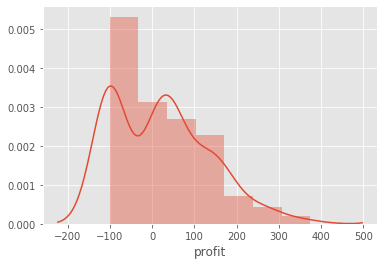

In [299]:
sns.distplot(model_2gbc['profit'])

In [300]:
model_2gbc['profit'].value_counts()

-100.000000    75
 0.000000      17
 103.000000     3
 16.000000      2
 135.000000     2
               ..
 23.866348      1
 115.873016     1
 112.406948     1
 15.873016      1
 181.967213     1
Name: profit, Length: 110, dtype: int64

(array([75.,  0., 53., 25., 16., 23.,  6.,  7.,  1.,  2.]),
 array([-100. ,  -52.6,   -5.2,   42.2,   89.6,  137. ,  184.4,  231.8,
         279.2,  326.6,  374. ]),
 <a list of 10 Patch objects>)

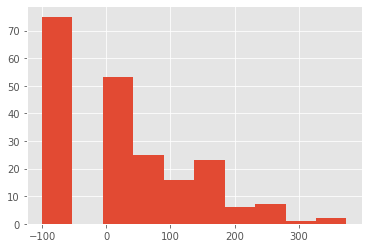

In [301]:
plt.hist(model_2gbc['profit'], )

In [319]:
model_2gbc.loc[model_2gbc['team_fav']==1, 'control_bet_for'] = 'team'
model_2gbc.loc[model_2gbc['opp_fav']==1, 'control_bet_for'] = 'opp'

In [330]:
model_2gbc.loc[model_2gbc['team_fav']==0, 'control_bet_ud'] = 'team'
model_2gbc.loc[model_2gbc['opp_fav']==0, 'control_bet_ud'] = 'opp'

In [321]:
model_2gbc.columns

Index(['ID', 'team', 'opp', 'proba_win', 'proba_opp_win', 'team_won?',
       'opp_won?', 'team_fav', 'opp_fav', 'money_line', 'opp_money_line',
       'week', 'dec_ml', 'dec_oml', 'team_AWPB', 'opp_AWPB', 'team_EV',
       'opp_EV', 'bet_amount', 'bet_placed', 'bet_amt', 'winnings', 'profit',
       'control_bet_for'],
      dtype='object')

In [326]:
model_2gbc.loc[(model_2gbc['control_bet_for']=='team') & (model_2gbc['team_won?']== 1), 'control_prof'] = (100*model_2gbc['dec_ml'])-100
model_2gbc.loc[(model_2gbc['control_bet_for']=='opp') & (model_2gbc['opp_won?']== 1), 'control_prof'] = (100*model_2gbc['dec_oml'])-100
model_2gbc.loc[(model_2gbc['control_bet_for']=='team') & (model_2gbc['team_won?']== 0), 'control_prof'] = -100 
model_2gbc.loc[(model_2gbc['control_bet_for']=='opp') & (model_2gbc['opp_won?']== 0), 'control_prof'] = -100

In [331]:
model_2gbc.loc[(model_2gbc['control_bet_ud']=='team') & (model_2gbc['team_won?']== 1), 'control_prof_ud'] = (100*model_2gbc['dec_ml'])-100
model_2gbc.loc[(model_2gbc['control_bet_ud']=='opp') & (model_2gbc['opp_won?']== 1), 'control_prof_ud'] = (100*model_2gbc['dec_oml'])-100
model_2gbc.loc[(model_2gbc['control_bet_ud']=='team') & (model_2gbc['team_won?']== 0), 'control_prof_ud'] = -100 
model_2gbc.loc[(model_2gbc['control_bet_ud']=='opp') & (model_2gbc['opp_won?']== 0), 'control_prof_ud'] = -100                                            

In [336]:
model_2gbc['profit'].value_counts()

-100.000000    75
 0.000000      17
 103.000000     3
 16.000000      2
 135.000000     2
               ..
 23.866348      1
 115.873016     1
 112.406948     1
 15.873016      1
 181.967213     1
Name: profit, Length: 110, dtype: int64

In [349]:
model_2gbc.to_csv('model6920_results.csv')

In [350]:
df5 = pd.read_csv('model6920_results.csv')

In [352]:
df5.columns

Index(['Unnamed: 0', 'ID', 'team', 'opp', 'proba_win', 'proba_opp_win',
       'team_won?', 'opp_won?', 'team_fav', 'opp_fav', 'money_line',
       'opp_money_line', 'week', 'dec_ml', 'dec_oml', 'team_AWPB', 'opp_AWPB',
       'team_EV', 'opp_EV', 'bet_amount', 'bet_placed', 'bet_amt', 'winnings',
       'profit', 'control_bet_for', 'control_prof', 'control_bet_ud',
       'control_prof_ud'],
      dtype='object')

In [353]:
df6 = df5[['ID', 'team', 'opp', 'proba_win', 'proba_opp_win',
       'team_won?', 'opp_won?', 'team_fav', 'opp_fav', 'money_line',
       'opp_money_line', 'week', 'dec_ml', 'dec_oml']]
df6

,ID,team,opp,proba_win,proba_opp_win,team_won?,opp_won?,team_fav,opp_fav,money_line,opp_money_line,week,dec_ml,dec_oml
0,204,BENGALS,STEELERS,0.000015,0.000030,0,1,0,1,160,-179,4,2.600000,1.558659
1,205,BILLS,PATRIOTS,0.999993,0.999996,0,1,0,1,274,-321,4,3.740000,1.311526
2,206,PANTHERS,TEXANS,0.001813,0.216316,1,0,0,1,224,-257,4,3.240000,1.389105
3,207,BEARS,VIKINGS,0.573896,0.131287,1,0,1,0,-103,-107,4,1.970874,1.934579
4,208,RAVENS,BROWNS,0.999971,0.000021,0,1,1,0,-327,279,4,1.305810,3.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,22,RAIDERS,BRONCOS,0.459792,0.337255,0,1,0,1,195,-221,17,2.950000,1.452489
204,23,STEELERS,RAVENS,0.914888,0.998453,0,1,1,0,-134,121,17,1.746269,2.210000
205,24,CHIEFS,CHARGERS,0.990586,0.938186,1,0,1,0,-389,325,17,1.257069,4.250000
206,25,SEAHAWKS,49ERS,0.052291,0.993597,0,1,0,1,159,-177,17,2.590000,1.564972


In [354]:
df6.loc[df6['proba_win'] > df6['proba_opp_win'], 'bet_placed'] = 'team'
df6.loc[df6['proba_win'] < df6['proba_opp_win'], 'bet_placed'] = 'opp'
df6.loc[df6['proba_win'] == df6['proba_opp_win'], 'bet_placed'] = 'push'


/home/robert/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/robert/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [358]:
df6['bet_amount'] = 100

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [362]:
df6.loc[(df6['team_won?']==1) & (df6['bet_placed']=='team'), 'profit'] = (100*df6['dec_ml'])-100            
df6.loc[(df6['team_won?']==0) & (df6['bet_placed']=='team'), 'profit'] = -100
df6.loc[(df6['opp_won?']==1) & (df6['bet_placed']=='opp'), 'profit'] = (100*df6['dec_oml'])-100            
df6.loc[(df6['opp_won?']==0) & (df6['bet_placed']=='opp'), 'profit'] = -100   

In [364]:
df6['profit'].sum()

1069.7196632818861

In [365]:
df6['profit'].value_counts()

-100.000000    72
 55.865922      4
 43.478261      2
 33.783784      2
 27.322404      2
               ..
 63.694268      1
 26.666667      1
 52.631579      1
 15.082956      1
 27.472527      1
Name: profit, Length: 123, dtype: int64

In [368]:
df6.to_csv('baseline_model_6920.csv')

In [393]:
model_2gb.loc[model_2gb['proba_win'] > model_2gb['proba_opp_win'], 'bet_placed'] = 'team'
model_2gb.loc[model_2gb['proba_win'] < model_2gb['proba_opp_win'], 'bet_placed'] = 'opp'
model_2gb.loc[model_2gb['proba_win'] == model_2gb['proba_opp_win'], 'bet_placed'] = 'push'

In [437]:
model_3gb.loc[model_3gb['proba_win'] > model_3gb['proba_opp_win'], 'bet_placed'] = 'team'
model_3gb.loc[model_3gb['proba_win'] < model_3gb['proba_opp_win'], 'bet_placed'] = 'opp'
model_3gb.loc[model_3gb['proba_win'] == model_3gb['proba_opp_win'], 'bet_placed'] = 'push'

In [927]:
model_gb.loc[model_gb['proba_win'] > model_gb['proba_opp_win'], 'bet_placed'] = 'team'
model_gb.loc[model_gb['proba_win'] < model_gb['proba_opp_win'], 'bet_placed'] = 'opp'
model_gb.loc[model_gb['proba_win'] == model_gb['proba_opp_win'], 'bet_placed'] = 'push'

In [542]:
model_rf.loc[model_rf['proba_win'] > model_rf['proba_opp_win'], 'bet_placed'] = 'team'
model_rf.loc[model_rf['proba_win'] < model_rf['proba_opp_win'], 'bet_placed'] = 'opp'
model_rf.loc[model_rf['proba_win'] == model_rf['proba_opp_win'], 'bet_placed'] = 'push'

In [394]:
model_2gb.loc[(model_2gb['team_won?']==1) & (model_2gb['bet_placed']=='team'), 'profit'] = (100*model_2gb['dec_ml'])-100            
model_2gb.loc[(model_2gb['team_won?']==0) & (model_2gb['bet_placed']=='team'), 'profit'] = -100
model_2gb.loc[(model_2gb['opp_won?']==1) & (model_2gb['bet_placed']=='opp'), 'profit'] = (100*model_2gb['dec_oml'])-100            
model_2gb.loc[(model_2gb['opp_won?']==0) & (model_2gb['bet_placed']=='opp'), 'profit'] = -100   

In [438]:
model_3gb.loc[(model_3gb['team_won?']==1) & (model_3gb['bet_placed']=='team'), 'profit'] = (100*model_3gb['dec_ml'])-100            
model_3gb.loc[(model_3gb['team_won?']==0) & (model_3gb['bet_placed']=='team'), 'profit'] = -100
model_3gb.loc[(model_3gb['opp_won?']==1) & (model_3gb['bet_placed']=='opp'), 'profit'] = (100*model_3gb['dec_oml'])-100            
model_3gb.loc[(model_3gb['opp_won?']==0) & (model_3gb['bet_placed']=='opp'), 'profit'] = -100   

In [928]:
model_gb.loc[(model_gb['team_won?']==1) & (model_gb['bet_placed']=='team'), 'profit'] = (100*model_gb['dec_ml'])-100            
model_gb.loc[(model_gb['team_won?']==0) & (model_gb['bet_placed']=='team'), 'profit'] = -100
model_gb.loc[(model_gb['opp_won?']==1) & (model_gb['bet_placed']=='opp'), 'profit'] = (100*model_gb['dec_oml'])-100            
model_gb.loc[(model_gb['opp_won?']==0) & (model_gb['bet_placed']=='opp'), 'profit'] = -100   

In [543]:
model_rf.loc[(model_rf['team_won?']==1) & (model_rf['bet_placed']=='team'), 'profit'] = (100*model_rf['dec_ml'])-100            
model_rf.loc[(model_rf['team_won?']==0) & (model_rf['bet_placed']=='team'), 'profit'] = -100
model_rf.loc[(model_rf['opp_won?']==1) & (model_rf['bet_placed']=='opp'), 'profit'] = (100*model_rf['dec_oml'])-100            
model_rf.loc[(model_rf['opp_won?']==0) & (model_rf['bet_placed']=='opp'), 'profit'] = -100   

In [395]:
model_2gb['profit'].sum()

265.29210039036536

In [929]:
model_gb['profit'].sum()

908.3669625389839

In [439]:
model_3gb['profit'].sum()

-93.29030498738149

In [544]:
model_rf['profit'].sum()

-2746.98688683819

In [396]:
model_2gb

,ID,team,opp,proba_win,proba_opp_win,team_won?,opp_won?,team_fav,opp_fav,money_line,opp_money_line,week,dec_ml,dec_oml,bet_placed,profit
0,204,BENGALS,STEELERS,1.51306e-05,3.0409e-05,0,1,0,1,160.0,-179.0,4,2.600000,1.558659,opp,55.865922
1,205,BILLS,PATRIOTS,0.999993,0.999996,0,1,0,1,274.0,-321.0,4,3.740000,1.311526,opp,31.152648
2,206,PANTHERS,TEXANS,0.00182169,0.216316,1,0,0,1,224.0,-257.0,4,3.240000,1.389105,opp,-100.000000
3,207,BEARS,VIKINGS,0.573896,0.131287,1,0,1,0,-103.0,-107.0,4,1.970874,1.934579,team,97.087379
4,208,RAVENS,BROWNS,0.999971,2.13039e-05,0,1,1,0,-327.0,279.0,4,1.305810,3.790000,team,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,22,RAIDERS,BRONCOS,0.401266,0.25475,0,1,0,1,195.0,-221.0,17,2.950000,1.452489,team,-100.000000
204,23,STEELERS,RAVENS,0.886801,0.998917,0,1,1,0,-134.0,121.0,17,1.746269,2.210000,opp,121.000000
205,24,CHIEFS,CHARGERS,0.99245,0.865763,1,0,1,0,-389.0,325.0,17,1.257069,4.250000,team,25.706941
206,25,SEAHAWKS,49ERS,0.027084,0.995636,0,1,0,1,159.0,-177.0,17,2.590000,1.564972,opp,56.497175


In [397]:
model_2gb['team_AWPB'] = 100 * model_2gb['dec_ml']
model_2gb['opp_AWPB'] = 100 * model_2gb['dec_oml']

In [440]:
model_3gb['team_AWPB'] = 100 * model_3gb['dec_ml']
model_3gb['opp_AWPB'] = 100 * model_3gb['dec_oml']

In [930]:
model_gb['team_AWPB'] = 100 * model_gb['dec_ml']
model_gb['opp_AWPB'] = 100 * model_gb['dec_oml']

In [545]:
model_rf['team_AWPB'] = 100 * model_rf['dec_ml']
model_rf['opp_AWPB'] = 100 * model_rf['dec_oml']

In [441]:
model_2gb['team_EV'] = (model_2gb['team_AWPB'] * model_2gb['proba_win']) - (100*(1-model_2gb['proba_win']))
model_2gb['opp_EV'] = (model_2gb['opp_AWPB'] * model_2gb['proba_opp_win']) - (100*(1-model_2gb['proba_opp_win']))

In [442]:
model_3gb['team_EV'] = (model_3gb['team_AWPB'] * model_3gb['proba_win']) - (100*(1-model_3gb['proba_win']))
model_3gb['opp_EV'] = (model_3gb['opp_AWPB'] * model_3gb['proba_opp_win']) - (100*(1-model_3gb['proba_opp_win']))

In [931]:
model_gb['team_EV'] = (model_gb['team_AWPB'] * model_gb['proba_win']) - (100*(1-model_gb['proba_win']))
model_gb['opp_EV'] = (model_gb['opp_AWPB'] * model_gb['proba_opp_win']) - (100*(1-model_gb['proba_opp_win']))

In [546]:
model_rf['team_EV'] = (model_rf['team_AWPB'] * model_rf['proba_win']) - (100*(1-model_rf['proba_win']))
model_rf['opp_EV'] = (model_rf['opp_AWPB'] * model_rf['proba_opp_win']) - (100*(1-model_rf['proba_opp_win']))

In [401]:
model_2gb.loc[(model_2gb['team_EV']> 0) | (model_2gb['opp_EV']> 0), 'ev_bet'] = True
model_2gb.loc[(model_2gb['team_EV']< 0) & (model_2gb['opp_EV']< 0), 'ev_bet'] = False

In [443]:
model_3gb.loc[(model_3gb['team_EV']> 0) | (model_3gb['opp_EV']> 0), 'ev_bet'] = True
model_3gb.loc[(model_3gb['team_EV']< 0) & (model_3gb['opp_EV']< 0), 'ev_bet'] = False

In [932]:
model_gb.loc[(model_gb['team_EV']> 0) | (model_gb['opp_EV']> 0), 'ev_bet'] = True
model_gb.loc[(model_gb['team_EV']< 0) & (model_gb['opp_EV']< 0), 'ev_bet'] = False

In [547]:
model_rf.loc[(model_rf['team_EV']> 0) | (model_rf['opp_EV']> 0), 'ev_bet'] = True
model_rf.loc[(model_rf['team_EV']< 0) & (model_rf['opp_EV']< 0), 'ev_bet'] = False

In [402]:
model_2gb.loc[model_2gb['ev_bet']==True, 'ev_for'] = 

,ID,team,opp,proba_win,proba_opp_win,team_won?,opp_won?,team_fav,opp_fav,money_line,...,week,dec_ml,dec_oml,bet_placed,profit,team_AWPB,opp_AWPB,team_EV,opp_EV,ev_bet
0,204,BENGALS,STEELERS,1.51306e-05,3.0409e-05,0,1,0,1,160.0,...,4,2.600000,1.558659,opp,55.865922,260.000000,155.865922,-99.9946,-99.9922,False
1,205,BILLS,PATRIOTS,0.999993,0.999996,0,1,0,1,274.0,...,4,3.740000,1.311526,opp,31.152648,374.000000,131.152648,373.997,131.152,True
2,206,PANTHERS,TEXANS,0.00182169,0.216316,1,0,0,1,224.0,...,4,3.240000,1.389105,opp,-100.000000,324.000000,138.910506,-99.2276,-48.3199,False
3,207,BEARS,VIKINGS,0.573896,0.131287,1,0,1,0,-103.0,...,4,1.970874,1.934579,team,97.087379,197.087379,193.457944,70.4974,-61.4728,True
4,208,RAVENS,BROWNS,0.999971,2.13039e-05,0,1,1,0,-327.0,...,4,1.305810,3.790000,team,-100.000000,130.581040,379.000000,130.574,-99.9898,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,22,RAIDERS,BRONCOS,0.401266,0.25475,0,1,0,1,195.0,...,17,2.950000,1.452489,team,-100.000000,295.000000,145.248869,58.4999,-37.5229,True
204,23,STEELERS,RAVENS,0.886801,0.998917,0,1,1,0,-134.0,...,17,1.746269,2.210000,opp,121.000000,174.626866,221.000000,143.539,220.652,True
205,24,CHIEFS,CHARGERS,0.99245,0.865763,1,0,1,0,-389.0,...,17,1.257069,4.250000,team,25.706941,125.706941,425.000000,124.003,354.525,True
206,25,SEAHAWKS,49ERS,0.027084,0.995636,0,1,0,1,159.0,...,17,2.590000,1.564972,opp,56.497175,259.000000,156.497175,-90.2768,155.378,True


In [403]:
def ev_for(df):
    if (df['ev_bet'] ==True) and (df['team_EV'] > df['opp_EV']):
        return 'team'
    elif (df['ev_bet'] ==True) and (df['team_EV'] < df['opp_EV']):
        return 'opp'
    elif df['ev_bet'] == False:
        return 'no bet'

In [404]:
model_2gb['ev_for'] = model_2gb.apply(ev_for, axis = 1)

In [444]:
model_3gb['ev_for'] = model_3gb.apply(ev_for, axis = 1)

In [933]:
model_gb['ev_for'] = model_gb.apply(ev_for, axis = 1)

In [548]:
model_rf['ev_for'] = model_rf.apply(ev_for, axis = 1)

In [406]:
model_2gb.loc[(model_2gb['team_won?']==1) & (model_2gb['ev_for']=='team'), 'ev_profit'] = (100*model_2gb['dec_ml'])-100            
model_2gb.loc[(model_2gb['team_won?']==0) & (model_2gb['ev_for']=='team'), 'ev_profit'] = -100
model_2gb.loc[(model_2gb['opp_won?']==1) & (model_2gb['ev_for']=='opp'), 'ev_profit'] = (100*model_2gb['dec_oml'])-100            
model_2gb.loc[(model_2gb['opp_won?']==0) & (model_2gb['ev_for']=='opp'), 'ev_profit'] = -100  

In [445]:
model_3gb.loc[(model_3gb['team_won?']==1) & (model_3gb['ev_for']=='team'), 'ev_profit'] = (100*model_3gb['dec_ml'])-100            
model_3gb.loc[(model_3gb['team_won?']==0) & (model_3gb['ev_for']=='team'), 'ev_profit'] = -100
model_3gb.loc[(model_3gb['opp_won?']==1) & (model_3gb['ev_for']=='opp'), 'ev_profit'] = (100*model_3gb['dec_oml'])-100            
model_3gb.loc[(model_3gb['opp_won?']==0) & (model_3gb['ev_for']=='opp'), 'ev_profit'] = -100  

In [934]:
model_gb.loc[(model_gb['team_won?']==1) & (model_gb['ev_for']=='team'), 'ev_profit'] = (100*model_gb['dec_ml'])-100            
model_gb.loc[(model_gb['team_won?']==0) & (model_gb['ev_for']=='team'), 'ev_profit'] = -100
model_gb.loc[(model_gb['opp_won?']==1) & (model_gb['ev_for']=='opp'), 'ev_profit'] = (100*model_gb['dec_oml'])-100            
model_gb.loc[(model_gb['opp_won?']==0) & (model_gb['ev_for']=='opp'), 'ev_profit'] = -100  
model_gb.loc[(model_gb['opp_won?']==0) & (model_gb['ev_for']=='no bet'), 'ev_profit'] = 0  
model_gb.loc[(model_gb['opp_won?']==1) & (model_gb['ev_for']=='no bet'), 'ev_profit'] = 0

In [446]:
model_3gb.loc[(model_3gb['opp_won?']==0) & (model_3gb['ev_for']=='no bet'), 'ev_profit'] = 0  
model_3gb.loc[(model_3gb['opp_won?']==1) & (model_3gb['ev_for']=='no bet'), 'ev_profit'] = 0

In [807]:
model_gb.loc[(model_gb['opp_won?']==0) & (model_gb['ev_for']=='no bet'), 'ev_profit'] = 0  
model_gb.loc[(model_gb['opp_won?']==1) & (model_gb['ev_for']=='no bet'), 'ev_profit'] = 0

In [549]:
model_rf.loc[(model_rf['team_won?']==1) & (model_rf['ev_for']=='team'), 'ev_profit'] = (100*model_rf['dec_ml'])-100            
model_rf.loc[(model_rf['team_won?']==0) & (model_rf['ev_for']=='team'), 'ev_profit'] = -100
model_rf.loc[(model_rf['opp_won?']==1) & (model_rf['ev_for']=='opp'), 'ev_profit'] = (100*model_rf['dec_oml'])-100            
model_rf.loc[(model_rf['opp_won?']==0) & (model_rf['ev_for']=='opp'), 'ev_profit'] = -100 
model_rf.loc[(model_rf['opp_won?']==0) & (model_rf['ev_for']=='no bet'), 'ev_profit'] = 0  
model_rf.loc[(model_rf['opp_won?']==1) & (model_rf['ev_for']=='no bet'), 'ev_profit'] = 0 

In [410]:
model_2gb['ev_profit'].sum()

167.70731543123247

In [447]:
model_3gb['ev_profit'].sum()

717.8528279073633

In [935]:
model_gb['ev_profit'].sum()

1097.6545374735467

In [936]:
model_gb['ev_profit'].value_counts()

-100.000000    63
 0.000000      37
 55.865922      3
 103.000000     3
 160.000000     2
               ..
 60.606061      1
 41.841004      1
 32.467532      1
 23.866348      1
 23.474178      1
Name: ev_profit, Length: 88, dtype: int64

In [946]:
y_ud1

15    -100.000000
16    -200.000000
17     -40.000000
18     356.000000
19     495.000000
          ...    
203   -309.164983
204   -188.164983
205   -288.164983
206   -388.164983
207   -488.164983
Name: control_prof_ud, Length: 193, dtype: float64

In [947]:
y_fav1

15      44.247788
16      92.556966
17      -7.443034
18    -107.443034
19    -207.443034
          ...    
203   -439.616502
204   -539.616502
205   -513.909561
206   -457.412386
207   -441.412386
Name: control_prof, Length: 193, dtype: float64

In [550]:
model_rf['ev_profit'].sum()

-1557.6986480771805

In [412]:
model_2gb.to_csv('model2_6920.csv')

In [453]:
model_3gb['ev_profit'].value_counts()

-100.000000    68
 0.000000      42
 103.000000     3
 55.865922      3
 16.000000      2
               ..
 41.841004      1
 23.866348      1
 48.309179      1
 31.347962      1
 23.364486      1
Name: ev_profit, Length: 91, dtype: int64

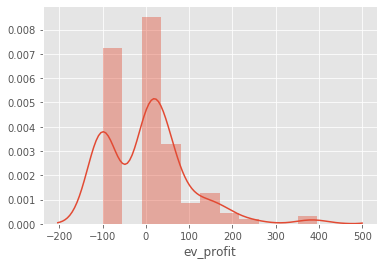

In [551]:
sns.distplot(model_3gb['ev_profit'])

In [937]:
y_ev1 = np.cumsum(model_gb['ev_profit'])

In [774]:
len(y_ev1)

193

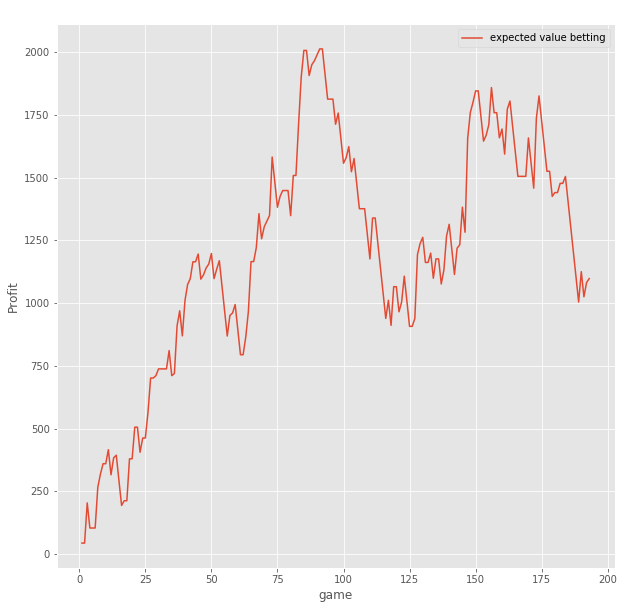

In [938]:
y = y_control
x = np.linspace(1,193,193)
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlabel("game")
ax.set_ylabel("Profit")
ax.set_title('Cumulative Profit - 2019 NFL Season')

#ax.plot(x, y_fav, label='Favorites')
#ax.plot(x, y_1, label='higher win proba')
#ax.plot(x, y_2, label='underdogs')
ax.plot(x,y_ev1, label='expected value betting')
#ax.plot(x, y_3, label='algo3')
#ax.plot(x, y_ud, label='Underdogs')

leg = ax.legend(loc='best')
for text in leg.get_texts():
    plt.setp(text, color = 'black')

In [868]:
model_gb['ev_profit'].value_counts()

-100.000000    64
 0.000000      38
 103.000000     3
 55.865922      3
 16.000000      2
               ..
 60.606061      1
 41.841004      1
 32.467532      1
 23.866348      1
 67.114094      1
Name: ev_profit, Length: 86, dtype: int64

In [940]:
model_gb

,ID,team,opp,proba_win,proba_opp_win,team_won?,opp_won?,team_fav,opp_fav,money_line,...,dec_oml,bet_placed,profit,team_AWPB,opp_AWPB,team_EV,opp_EV,ev_bet,ev_for,ev_profit
0,189,49ERS,BROWNS,0.999999,0.0221853,1,0,1,0,-226.0,...,3.000000,team,44.247788,144.247788,300.000000,144.248,-91.1259,True,team,44.247788
1,190,FALCONS,TEXANS,0.0207128,0.00401567,0,1,0,1,184.0,...,1.483092,team,-100.000000,284.000000,148.309179,-92.0463,-99.0029,False,no bet,0.000000
2,191,BILLS,TITANS,1,0.0378174,1,0,0,1,160.0,...,1.558659,team,160.000000,260.000000,155.865922,260,-90.3238,True,team,160.000000
3,192,CHIEFS,COLTS,0.999999,0.00335244,0,1,1,0,-488.0,...,4.960000,team,-100.000000,120.491803,496.000000,120.492,-98.0019,True,team,-100.000000
4,193,CARDINALS,BENGALS,2.40202e-07,3.32394e-06,1,0,0,1,139.0,...,1.649351,opp,-100.000000,239.000000,164.935065,-99.9999,-99.9991,False,no bet,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,22,RAIDERS,BRONCOS,0.38361,0.0496632,0,1,0,1,195.0,...,1.452489,team,-100.000000,295.000000,145.248869,51.526,-87.8201,True,team,-100.000000
189,23,STEELERS,RAVENS,0.946738,0.999765,0,1,1,0,-134.0,...,2.210000,opp,121.000000,174.626866,221.000000,160,220.924,True,opp,121.000000
190,24,CHIEFS,CHARGERS,0.987102,0.984707,1,0,1,0,-389.0,...,4.250000,team,25.706941,125.706941,425.000000,122.796,416.971,True,opp,-100.000000
191,25,SEAHAWKS,49ERS,0.0600656,0.998413,0,1,0,1,159.0,...,1.564972,opp,56.497175,259.000000,156.497175,-78.4365,156.09,True,opp,56.497175
